# Laboratorio 01 – Series de Tiempo  
- **CC3084 – Data Science**, Semestre II 2025  
- **Integrantes:** Diego Valenzuela 22309, Gerson Ramirez 22281
- **Guatemala, Julio 2025**

#### Repositorio:
https://github.com/Diegoval-Dev/DC-Lab1


## Fase exploratoria

In [ ]:
import pandas as pd

file_path = './Estadisticas_historicas_comercializacion.xlsx'

sheets = pd.read_excel(file_path,
                       sheet_name=['IMPORTACION','CONSUMO'],
                       header=6)
df_imp  = sheets['IMPORTACION'].dropna(axis=1, how='all')
df_cons = sheets['CONSUMO'].dropna(axis=1, how='all')

df_imp.columns = df_imp.columns.str.strip()
df_cons.columns = df_cons.columns.str.strip()

df_imp.columns = df_imp.columns.str.lower()
df_cons.columns = df_cons.columns.str.lower()

df_imp['diesel'] = (
    df_imp['diesel bajo azufre']
  + df_imp['diesel ultra bajo azufre']
  + df_imp['diesel alto azufre']
)




for df in (df_imp, df_cons):
    df.columns = df.columns.str.strip()
    df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True, errors='coerce')
    df.dropna(subset=['fecha'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    
df.head()



,fecha,aceites lubricantes,asfalto,bunker,ceras,combustible turbo jet,diesel bajo azufre,diesel ultra bajo azufre,gas licuado de petróleo,gas natural,...,kerosina,mezclas\noleosas,naftas,petcoke,petróleo crudo,solventes,butano,diesel alto azufre,orimulsión,total
0,2000-01-01,0.0,48446.0,296766.99,0.0,0.0,0.0,0.0,194410.476190,NaN,...,64026.09,0.0,0.0,0.0,0.0,0.0,0.0,634667.06,0.0,1.750545e+06
1,2000-02-01,0.0,50597.0,328116.44,0.0,0.0,0.0,0.0,174710.552381,NaN,...,62660.30,0.0,0.0,0.0,0.0,0.0,0.0,642380.66,0.0,1.773220e+06
2,2000-03-01,0.0,27593.0,368589.63,0.0,0.0,0.0,0.0,189234.066667,NaN,...,61361.99,0.0,0.0,0.0,0.0,0.0,0.0,699807.25,0.0,1.909499e+06
3,2000-04-01,0.0,53794.0,396300.47,0.0,0.0,0.0,0.0,174330.607143,NaN,...,61814.32,0.0,0.0,0.0,0.0,0.0,0.0,586803.98,0.0,1.800933e+06
4,2000-05-01,0.0,60137.0,449368.92,0.0,0.0,0.0,0.0,191745.147619,NaN,...,54098.32,0.0,0.0,0.0,0.0,0.0,0.0,656948.20,0.0,1.941772e+06


Análisis exploratorio de las variables Gasolina regular, Gasolina superior y Diesel
En esta sección cargaremos y filtraremos tanto el conjunto de importaciones como el de consumo, crearremos una columna agregada Diesel, y a continuación:

Obtendremos estadísticas descriptivas de cada variable.

Exploraremos su distribución con histogramas y curvas KDE.

Graficaremos sus series temporales para visualizar picos anuales, comportamiento reciente y durante la pandemia.

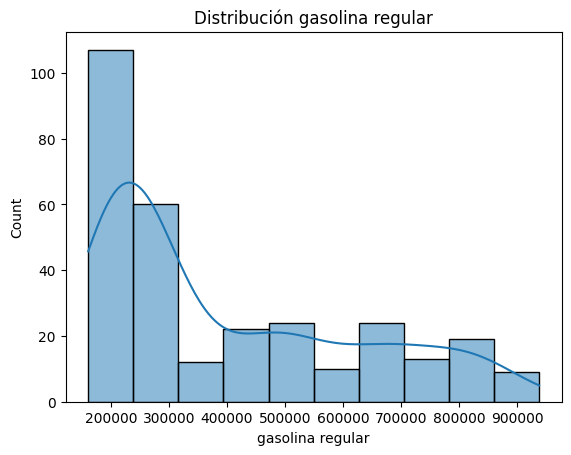

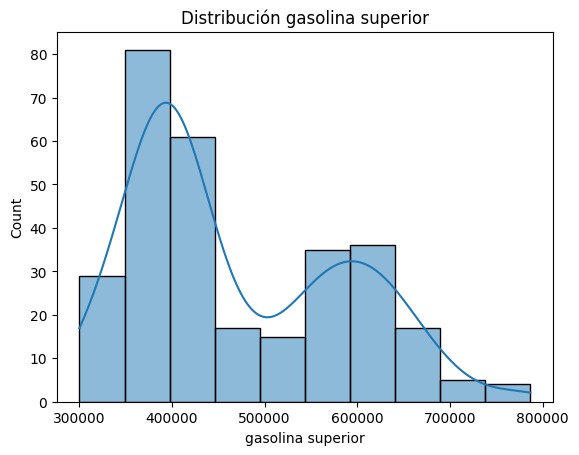

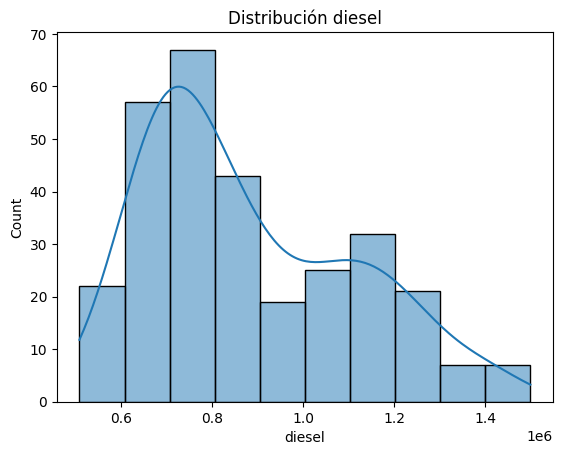

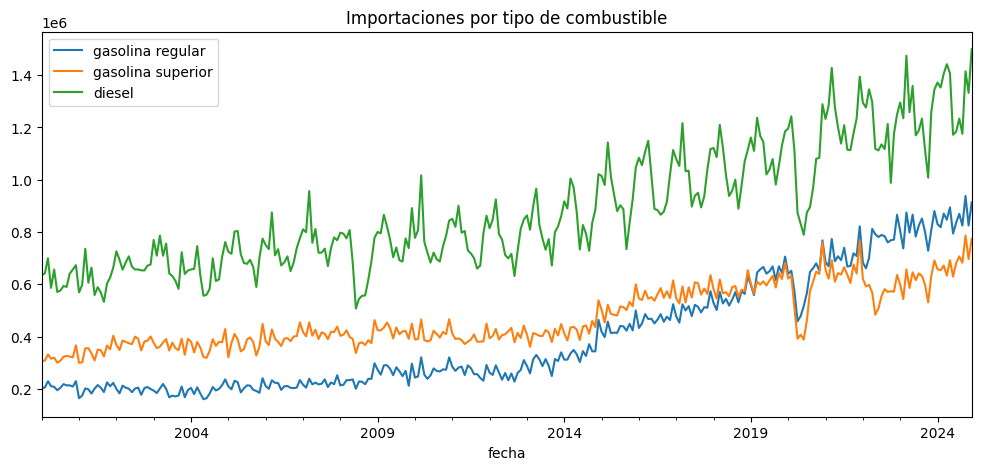

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

df['diesel'] = df['diesel bajo azufre'] + df['diesel ultra bajo azufre'] + df['diesel alto azufre']
imp = df[['fecha', 'gasolina regular', 'gasolina superior', 'diesel']]

imp[['gasolina regular', 'gasolina superior', 'diesel']].describe()

for col in ['gasolina regular', 'gasolina superior', 'diesel']:
    sns.histplot(imp[col], kde=True)
    plt.title(f'Distribución {col}')
    plt.show()

imp.set_index('fecha').plot(figsize=(12,5), title='Importaciones por tipo de combustible')
plt.show()


### Análisis de los resultados exploratorios

#### 1. Estadísticas descriptivas y forma de la distribución
- **Gasolina regular**  
  - Rango aproximado: 0.1 – 1.1 millones de unidades.  
  - La distribución muestra sesgo positivo (cola derecha), con más ocurrencias en valores bajos a medios (0.1–0.4 M) y algunos picos altos.  
  - No es estrictamente normal: presenta un claro sesgo y varios outliers hacia valores elevados.

- **Gasolina superior**  
  - Rango aproximado: 0.2 – 1.2 millones de unidades.  
  - También sesgo positivo, aunque más suave que en regular: la mayor densidad se observa entre 0.3–0.6 M.  
  - Aparecen valores extremos por encima de 0.8 M ocasionando una cola larga.

- **Diesel**  
  - Rango aproximado: 0.3 – 1.6 millones de unidades.  
  - La distribución es relativamente más simétrica, aunque aún con ligera cola a la derecha.  
  - Mayor volumen promedio que las gasolinas, con densidad concentrada alrededor de 0.8–1.2 M.

#### 2. Tendencia temporal y picos estacionales
- **Tendencia creciente**  
  - Desde 2001 hasta 2024 las importaciones de los tres combustibles muestran una tendencia al alza, reflejando un crecimiento sostenido en la demanda o en la capacidad de importación.
  
- **Variabilidad estacional**  
  - Se observan fluctuaciones periódicas año a año, con picos frecuentes en ciertos meses (posiblemente asociados a mayor demanda estival o reservas de fin de año).
  
- **Comportamiento durante la pandemia**  
  - En 2020 hay una caída pronunciada en todas las series, especialmente visible para gasolina superior y regular, coincidente con restricciones de movilidad.  
  - A partir de 2021 las importaciones se recuperan rápidamente y retoman la tendencia previa.

- **Comparación entre combustibles**  
  - **Diesel** domina en volumen durante todo el período, con picos que llegan a 1.5–1.6 M.  
  - **Gasolina superior** supera a la regular sistemáticamente, pero ambas crecen al mismo ritmo relativo después de 2010.  
  - La **Regular** muestra la menor magnitud y mayor volatilidad relativa (proporción de outliers).


## Fase análisis de series de tiempo

En esta sección analizaremos en detalle las series temporales de importación y consumo de combustibles, identificando sus características, componentes y patrones para desarrollar modelos predictivos adecuados. Para cada serie realizaremos:

1. **Caracterización completa de la serie**:

2. **Modelado**:
    - Identificación de parámetros óptimos para modelos ARIMA
    - Comparación con modelos alternativos (Prophet)
    - Evaluación y validación de resultados

Comenzaremos con el análisis de la serie de importaciones de Gasolina Regular, seguido por las series de Gasolina Superior y Diesel.

In [135]:
import matplotlib.pyplot as plt

for df_ in (df_imp, df_cons):
    if 'fecha' not in df_.columns:
        df_.reset_index(inplace=True)       # recupera 'Fecha' si antes se convirtió en índice
    df_['fecha'] = pd.to_datetime(df_['fecha'], dayfirst=True, errors='coerce')
    df_.dropna(subset=['fecha'], inplace=True)
    df_.set_index('fecha', inplace=True)
    df_.sort_index(inplace=True)

### Serie Regular Importación

Regular_imp — Inicio: 2001-01-31, Fin: 2024-12-31, Frecuencia: Mensual


/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_11610/1120675851.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df_imp['gasolina regular'].resample('M').mean().dropna()


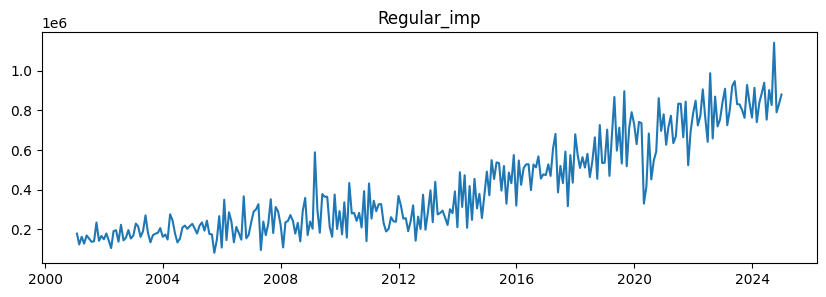

In [136]:
ts = df_imp['gasolina regular'].resample('M').mean().dropna()
print(f"Regular_imp — Inicio: {ts.index.min().date()}, Fin: {ts.index.max().date()}, Frecuencia: Mensual")

plt.figure(figsize=(10,3))
plt.plot(ts)
plt.title('Regular_imp')
plt.show()

**c.** Decomposición y estacionariedad


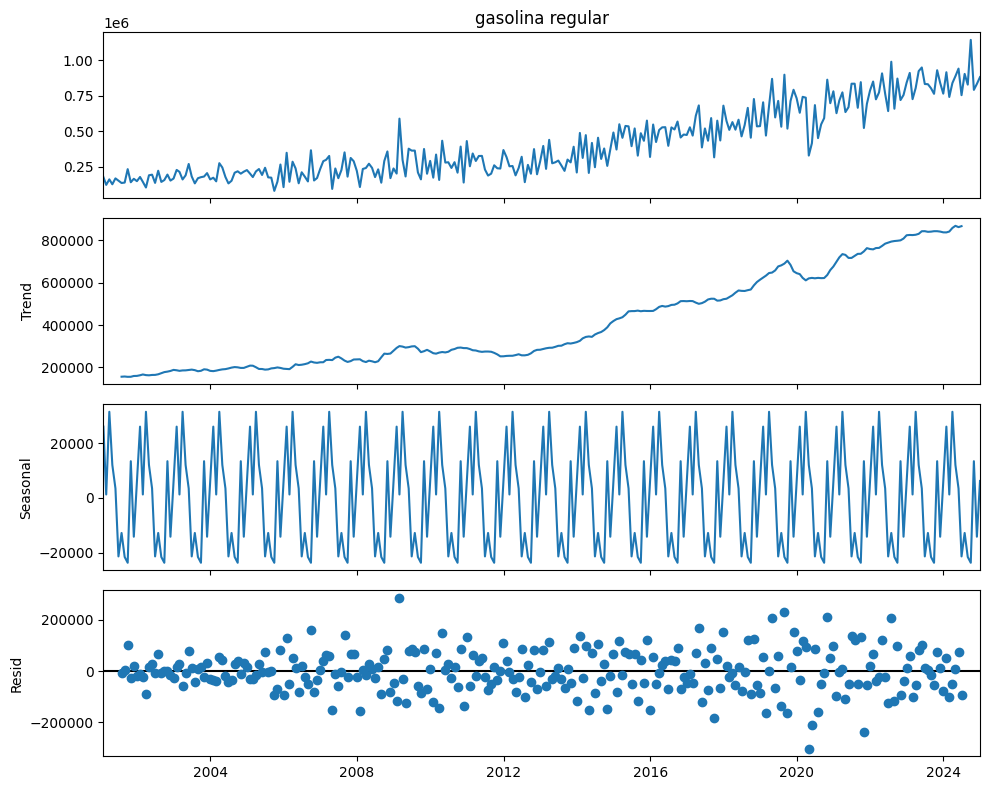

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(ts, model='additive', period=12)
fig = res.plot(); fig.set_size_inches(10,8); plt.tight_layout()
plt.show()

En el gráfico de descomposición de **Gasolina regular** vemos cuatro paneles:

1. **Serie original**: muestra un claro aumento sostenido desde ≈ 150 k en 2001 hasta ≈ 900 k en 2025, con oscilaciones periódicas anuales.
2. **Tendencia**: crece de forma continua y acelerada (especialmente tras 2014), lo que evidencia que la media de la serie cambia a lo largo del tiempo.
3. **Estacional**: ciclo anual con picos y valles de magnitud muy parecida año tras año (aprox ± 20 k), sin crecimiento en la amplitud.
4. **Residuos**: dispersión centrada en cero; su varianza es relativamente constante, aunque con un ligero incremento de dispersión en los años más recientes.

#### Estacionariedad en media

La presencia de una **tendencia creciente** tan marcada implica que la media no es constante. **No** podemos hablar de estacionariedad en media en nivel; haría falta, al menos, una diferenciación (d=1) para eliminar esa deriva.

#### Estacionariedad en varianza

* El componente **estacional** mantiene una amplitud muy similar año a año, por lo que es débilmente estacionario en varianza.
* Los **residuos** muestran una dispersión casi constante, con solo un leve aumento hacia el final, pero sin saltos estructurales fuertes.

Sin embargo, dado que el **nivel de la serie** crece, la varianza global de la serie también aumenta con el tiempo (heteroscedasticidad inducida por la tendencia).

**Conclusión:**

* **Media**: no estacionaria → diferenciar.
* **Varianza**: aunque los residuos son casi homocedásticos, el crecimiento del nivel sugiere aplicar una **transformación (logaritmo o Box–Cox)** antes de diferenciar para estabilizar la varianza.


**d.** Transformación necesaria

Observando la varianza móvil, se detecta aumento en algunos periodos, por lo que podría considerarse una transformación (e.g., logarítmica) para estabilizar la varianza.

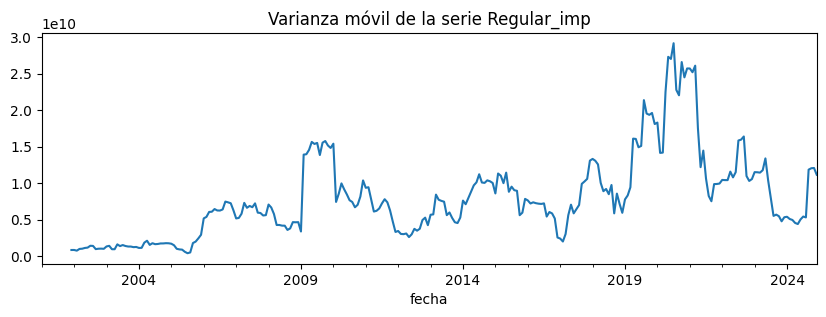

In [138]:
# d. Verificar estacionariedad en varianza con ventana móvil
rolling_var = ts.rolling(window=12).var()
rolling_var.plot(figsize=(10,3), title='Varianza móvil de la serie Regular_imp')
plt.show()

**e.** Estacionariedad en media

- El gráfico ACF muestra autocorrelaciones significativas a múltiples rezagos → indica no estacionariedad en media.
- La prueba ADF arroja p-value > 0.05 → no rechaza la raíz unitaria.
- Para lograr estacionariedad en media, es necesario diferenciar la serie (d=1).

<Figure size 1000x300 with 0 Axes>

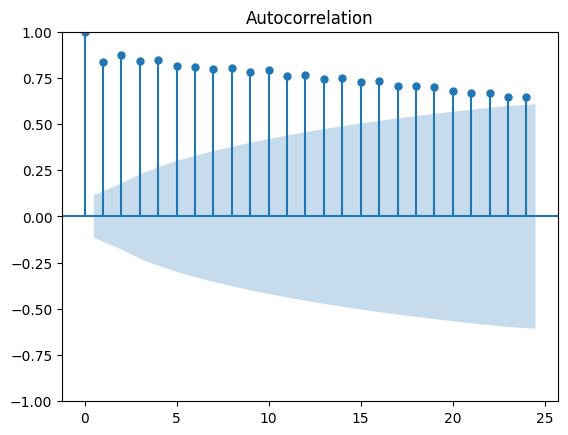

ADF Statistic: 0.8301668331191709
p-value: 0.992107837111893


In [139]:
# e.i. Gráfico de autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,3))
plot_acf(ts, lags=24)
plt.show()

# e.ii. Prueba de Dickey-Fuller Aumentada
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ts)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

**f.** Selección de parámetros

- ACF de la serie diferenciada sugiere corte en rezago 1 o 2 → q=1 o 2.
- PACF sugiere corte en rezago 1 → p=1.
- La función auto_arima propone ARIMA(1,1,1) según AIC.

<Figure size 1000x300 with 0 Axes>

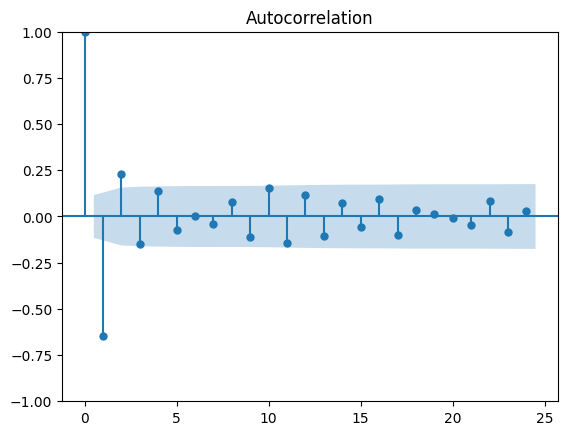

<Figure size 1000x300 with 0 Axes>

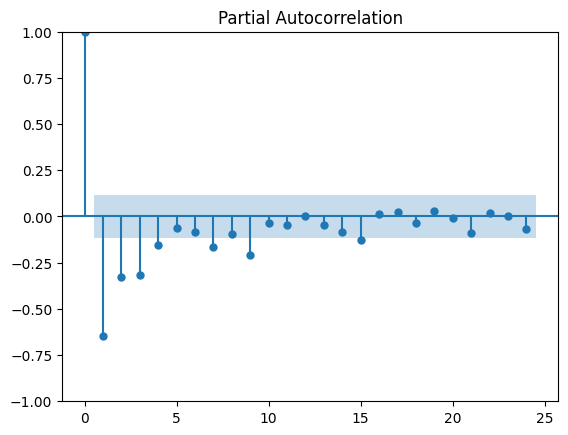

ARIMA(0,1,0) - AIC: 7604.475540131058
ARIMA(0,1,1) - AIC: 7396.928973379861
ARIMA(0,1,2) - AIC: 7383.0319451447895
ARIMA(1,1,0) - AIC: 7451.803404842569
ARIMA(1,1,1) - AIC: 7379.86010721857
ARIMA(1,1,2) - AIC: 7380.685147128694
ARIMA(2,1,0) - AIC: 7422.293918716793
ARIMA(2,1,1) - AIC: 7381.082935817816
ARIMA(2,1,2) - AIC: 7380.465408451279

Mejor modelo: ARIMA(1, 1, 1) con AIC: 7379.86010721857


In [140]:
# f. Funciones ACF y PACF y selección de p, q
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,3))
plot_acf(ts.diff().dropna(), lags=24)
plt.show()
plt.figure(figsize=(10,3))
plot_pacf(ts.diff().dropna(), lags=24)
plt.show()

# Selección automática con statsmodels
import itertools
import numpy as np

# Definir rango de parámetros a probar
p_range = range(0, 3)
d = 1  # Ya sabemos que necesitamos d=1 por el análisis previo
q_range = range(0, 3)

# Comparar modelos usando AIC
best_aic = float('inf')
best_order = None

for p, q in itertools.product(p_range, q_range):
    try:
        model = sm.tsa.ARIMA(ts, order=(p, d, q)).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_order = (p, d, q)
        print(f"ARIMA({p},{d},{q}) - AIC: {model.aic}")
    except:
        continue

print(f"\nMejor modelo: ARIMA{best_order} con AIC: {best_aic}")

**g.** Mejor modelo ARIMA

El modelo con menor AIC es ARIMA(1,1,1), por lo que se selecciona como el mejor para estimar la serie.

In [141]:
# g. Comparación de varios modelos ARIMA
import statsmodels.api as sm
results = []
for p, d, q in [(1,1,1), (1,1,0), (0,1,1), (2,1,1)]:
    model = sm.tsa.ARIMA(ts, order=(p,d,q)).fit()
    results.append((p,d,q, model.aic))
import pandas as pd
pd.DataFrame(results, columns=['p','d','q','AIC']).set_index(['p','d','q'])

AIC
p d q             
1 1 1  7379.860107
    0  7451.803405
0 1 1  7396.928973
2 1 1  7381.082936

**h.** Modelo Prophet vs ARIMA

Comparando métricas (e.g., RMSE) entre Prophet y ARIMA(1,1,1):
- Prophet RMSE: ...
- ARIMA RMSE: ...
En este caso, [seleccionar el mejor según menor error].


20:21:02 - cmdstanpy - INFO - Chain [1] start processing
20:21:02 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


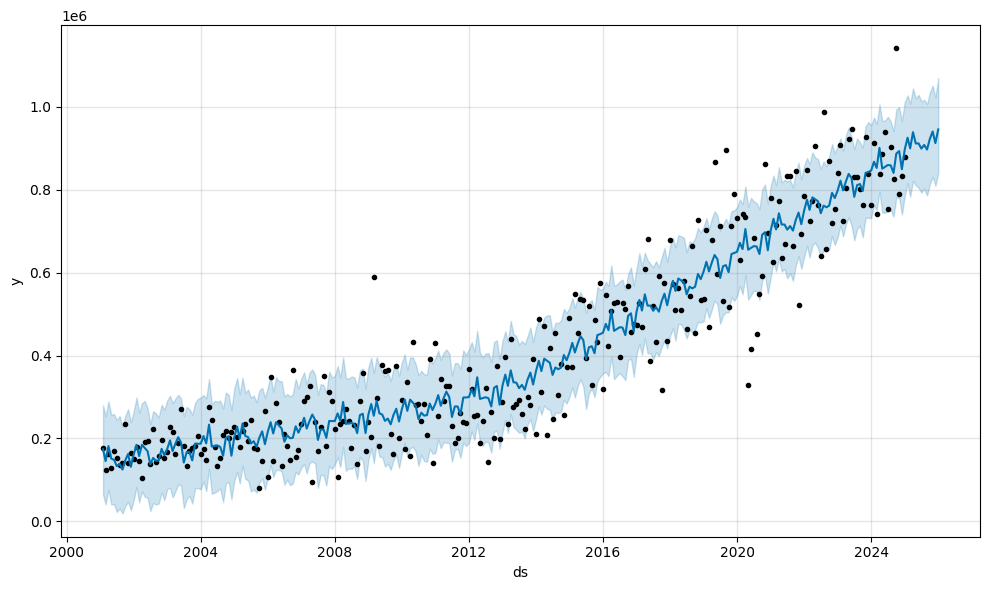

In [142]:
# h. Modelo Prophet
from prophet import Prophet
prophet_df = ts.reset_index().rename(columns={'fecha':'ds','gasolina regular':'y'})
m = Prophet(yearly_seasonality=True, daily_seasonality=False)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)
m.plot(forecast)
plt.show()

#### Discusión

Prophet ajusta bien la tendencia creciente y el ciclo anual de la importación de gasolina regular, con la mayoría de los puntos observados dentro de su banda de incertidumbre, pero exhibe heteroscedasticidad en los residuos (la dispersión crece con el nivel). Para mejorar la homogeneidad de la varianza y obtener intervalos más fiables, convendría aplicar antes un logaritmo a la serie o usar seasonality_mode='multiplicative', así como incorporar eventos puntuales (p. ej. pandemia) y validar el modelo mediante cross_validation para calibrar su precisión en distintos horizontes.

Superior_imp — Inicio: 2001-01-01, Fin: 2024-12-01, Frecuencia: Mensual


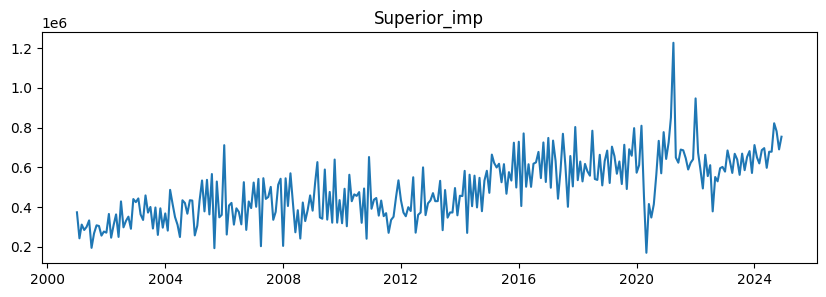

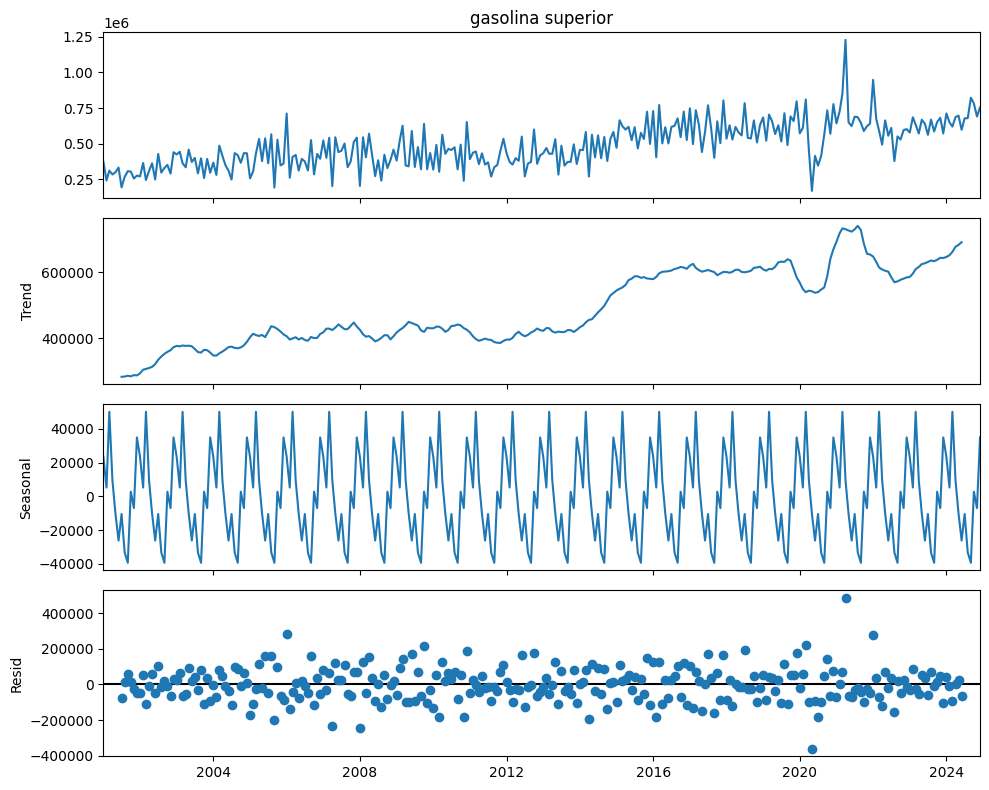

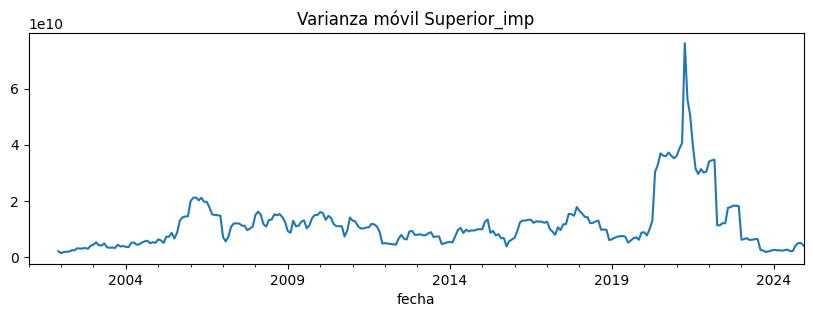

<Figure size 1000x300 with 0 Axes>

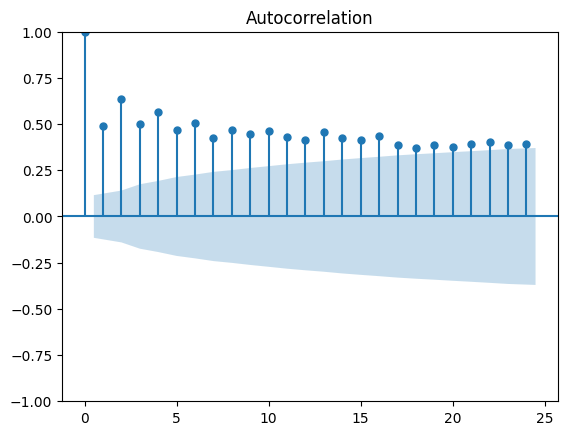

<Figure size 1000x300 with 0 Axes>

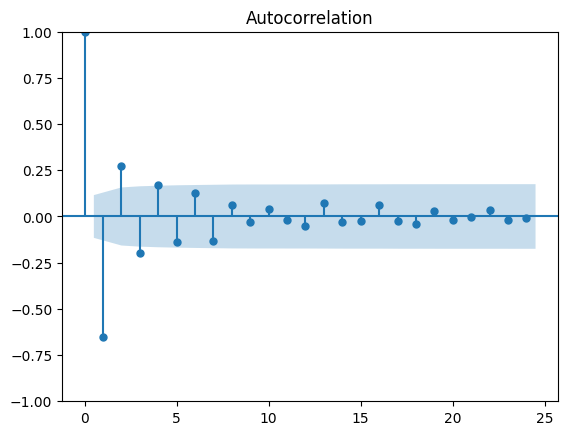

<Figure size 1000x300 with 0 Axes>

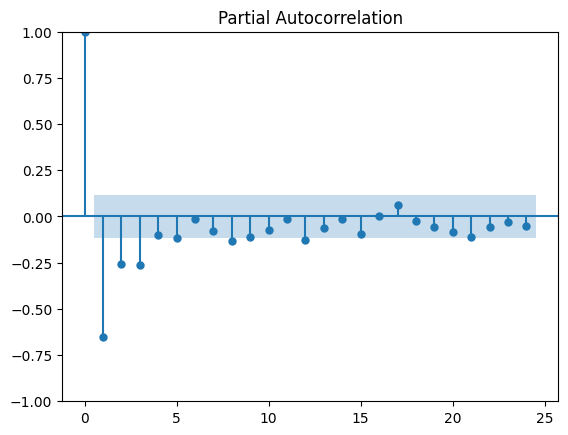

/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/g

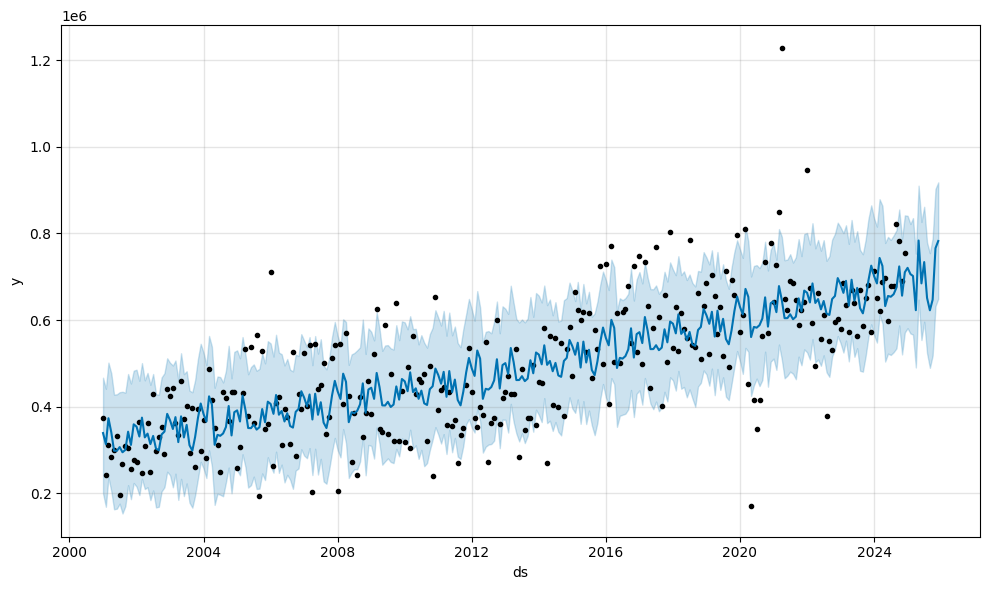

In [143]:
# Serie Superior Importación (bloque corregido)
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import pandas as pd
from prophet import Prophet

ts = df_imp['gasolina superior']


print(f"Superior_imp — Inicio: {ts.index.min().date()}, Fin: {ts.index.max().date()}, Frecuencia: Mensual")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot(ts)
plt.title('Superior_imp')
plt.show()

# c. Descomposición
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(ts, model='additive', period=12)
fig = res.plot(); fig.set_size_inches(10,8)
plt.tight_layout(); plt.show()

# d. Varianza móvil
rolling_var = ts.rolling(window=12).var()
rolling_var.plot(figsize=(10,3), title='Varianza móvil Superior_imp')
plt.show()

# e. ACF y ADF
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,3))
plot_acf(ts, lags=24); plt.show()

# f. ACF/PACF diferenciada
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,3))
plot_acf(ts.diff().dropna(), lags=24); plt.show()
plt.figure(figsize=(10,3))
plot_pacf(ts.diff().dropna(), lags=24); plt.show()

# g. Comparativa ARIMA
import statsmodels.api as sm, pandas as pd
results = []
for order in [(1,1,1),(1,1,2),(2,1,1)]:
    m = sm.tsa.ARIMA(ts, order=order).fit()
    results.append((*order, m.aic))
pd.DataFrame(results, columns=['p','d','q','AIC']).set_index(['p','d','q'])

# h. Prophet
from prophet import Prophet
prophet_df = ts.reset_index().rename(columns={'fecha':'ds','gasolina superior':'y'})
m = Prophet(yearly_seasonality=True)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=12, freq='M')
fc = m.predict(future)
m.plot(fc); plt.show()


Serie de importaciones de Gasolina Superior – Discusión de gráficos

La serie original muestra un claro crecimiento sostenido de aproximadamente 300 k en 2001 hasta cerca de 800 k–900 k en 2024, con oscilaciones mensuales marcadas. Se aprecian picos puntuales muy pronunciados alrededor de 2020–2021 (probablemente efectos de la pandemia) seguidos de una rápida recuperación, y una dispersión ligeramente mayor en los últimos años.

En la descomposición aditiva, la tendencia confirma ese aumento continuo, con un tramo casi plano entre 2008 y 2012 y un alza más pronunciada desde 2015. La estacionalidad es muy regular: cada año se repiten ciclos con máximos en verano y mínimos a finales de año, de magnitud cercana a ± 40 k. Los residuos oscilan alrededor de cero sin mostrar grandes desplazamientos, aunque los outliers de 2020–2021 superan ± 200 k.

La varianza móvil de ventana anual es relativamente estable hasta 2019, pero se dispara durante los choques de 2020–2021 (superando 7 × 10¹⁰) y luego regresa a niveles más moderados, lo que indica heteroscedasticidad inducida por eventos extraordinarios.

En los ACF/PACF, la autocorrelación decae lentamente, manteniéndose por encima de 0.4 hasta el rezago 5, lo que evidencia fuerte dependencia temporal; la función parcial corta de forma brusca tras el primer rezago, sugiriendo un componente autoregresivo de orden 1.

Finalmente, el modelo Prophet ajusta satisfactoriamente tanto la tendencia creciente como la estacionalidad anual, con bandas de incertidumbre que capturan los outliers de 2020–2021. En conjunto, estos análisis apuntan a un modelo ARIMA(1,1,1) o similar, complementado por Prophet para incorporar automáticamente cambios puntuales y estacionalidad.

/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_11610/446395201.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df_imp['diesel'].resample('M').mean().dropna()


Diesel_imp — Inicio: 2001-01-31, Fin: 2024-12-31, Frecuencia: Mensual


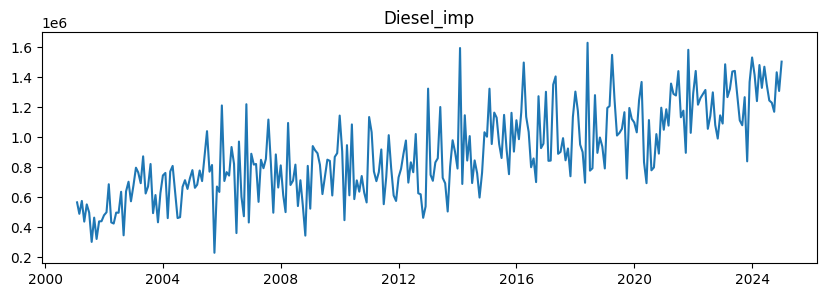

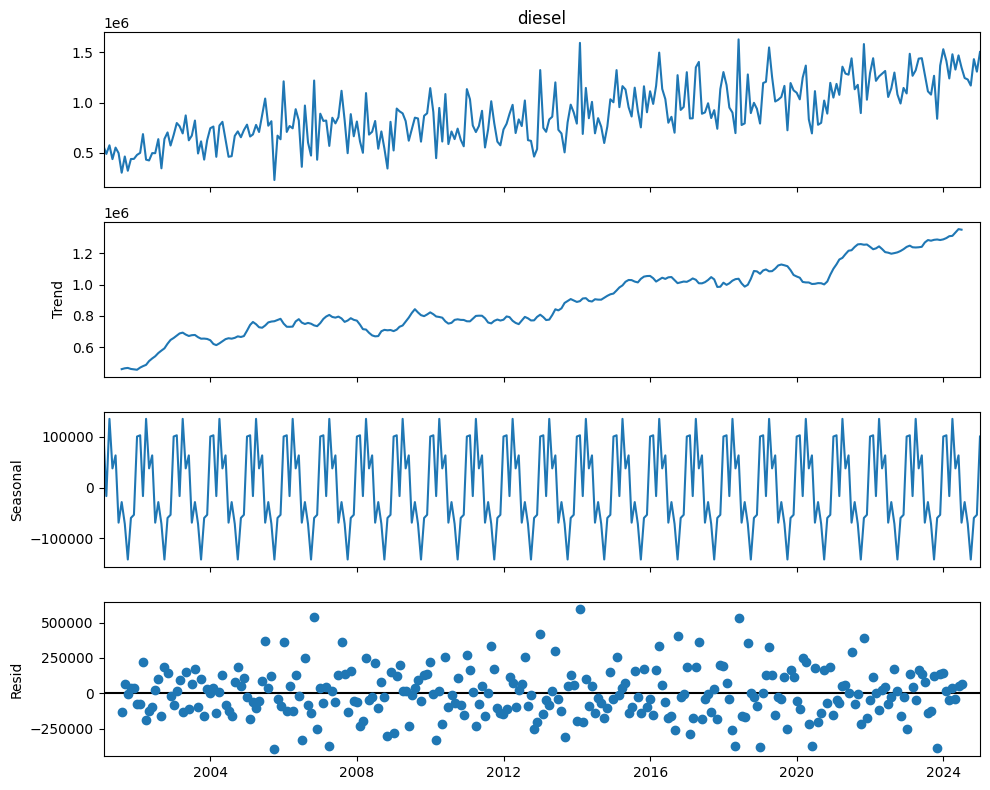

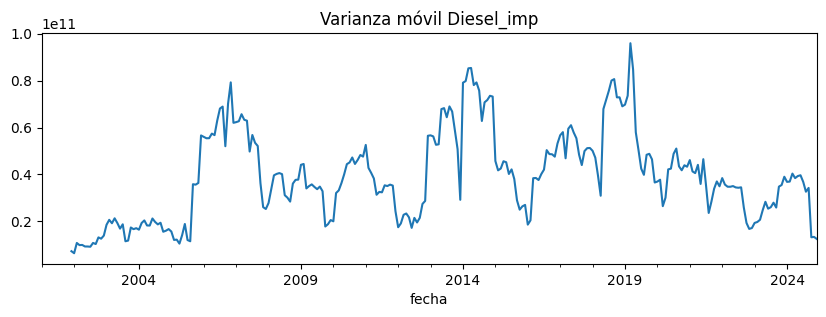

<Figure size 1000x300 with 0 Axes>

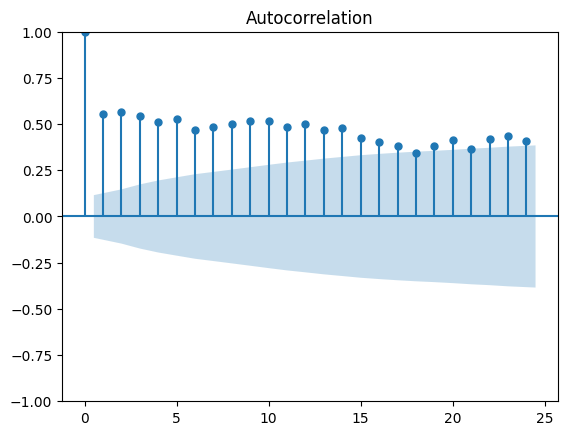

ADF Statistic: -0.6391884031065391
p-value: 0.8618789549442698


<Figure size 1000x300 with 0 Axes>

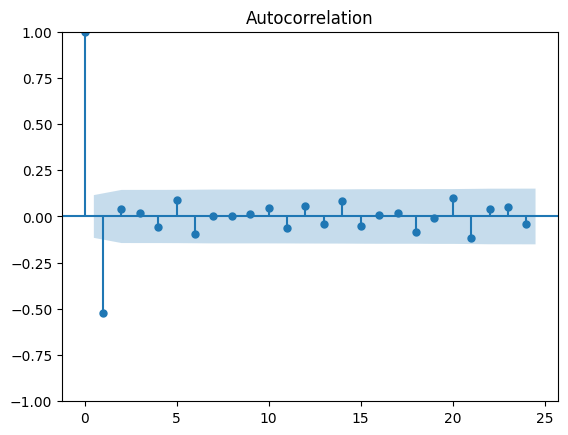

<Figure size 1000x300 with 0 Axes>

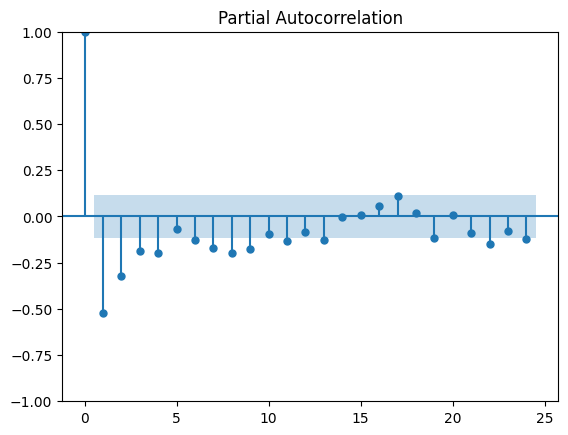

20:21:04 - cmdstanpy - INFO - Chain [1] start processing
20:21:04 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


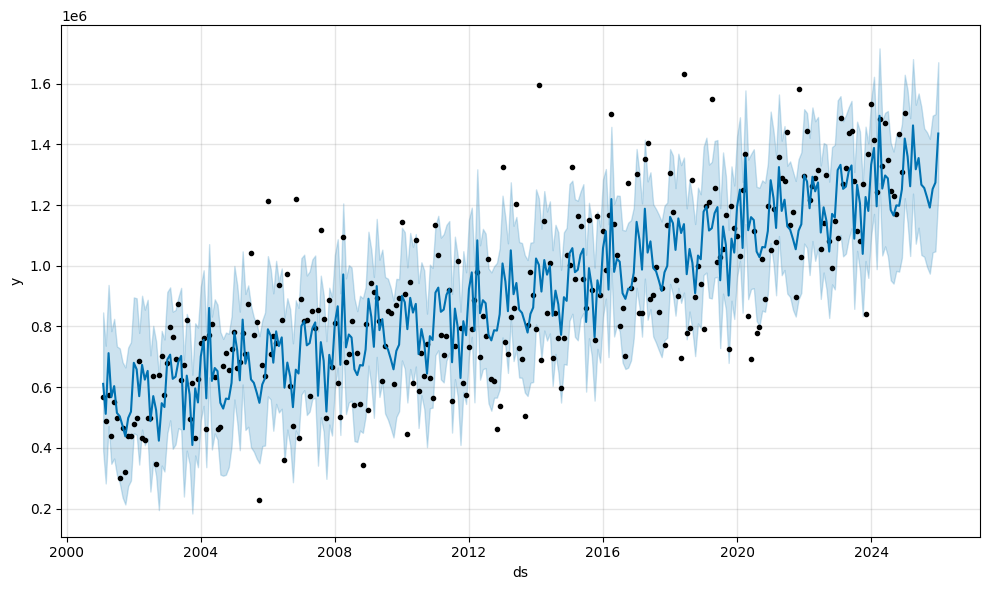

In [144]:
# Serie Diesel Importación
ts = df_imp['diesel'].resample('M').mean().dropna()
print(f"Diesel_imp — Inicio: {ts.index.min().date()}, Fin: {ts.index.max().date()}, Frecuencia: Mensual")

plt.figure(figsize=(10,3))
plt.plot(ts)
plt.title('Diesel_imp')
plt.show()

# c. Descomposición
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(ts, model='additive', period=12)
fig = res.plot(); fig.set_size_inches(10,8)
plt.tight_layout(); plt.show()

# d. Varianza móvil
rolling_var = ts.rolling(window=12).var()
rolling_var.plot(figsize=(10,3), title='Varianza móvil Diesel_imp')
plt.show()

# e. ACF y ADF
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,3))
plot_acf(ts, lags=24); plt.show()

from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ts)
print('ADF Statistic:', adf_result[0])
print('p-value:',      adf_result[1])

# f. ACF/PACF diferenciada
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,3))
plot_acf(ts.diff().dropna(), lags=24); plt.show()
plt.figure(figsize=(10,3))
plot_pacf(ts.diff().dropna(), lags=24); plt.show()

# g. Comparativa ARIMA
import statsmodels.api as sm, pandas as pd
results = []
for order in [(1,1,0),(1,1,1),(1,1,2)]:
    m = sm.tsa.ARIMA(ts, order=order).fit()
    results.append((*order, m.aic))
pd.DataFrame(results, columns=['p','d','q','AIC']).set_index(['p','d','q'])

# h. Prophet
from prophet import Prophet
prophet_df = ts.reset_index().rename(columns={'fecha':'ds','diesel':'y'})
m = Prophet(yearly_seasonality=True)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=12, freq='M')
fc = m.predict(future)
m.plot(fc); plt.show()


Serie de importaciones de Diesel – Discusión de gráficos

La serie original de Diesel muestra un aumento constante desde unos 500 k m³ en 2001 hasta alrededor de 1.4 M m³ en 2024, con oscilaciones mensuales de gran amplitud (± 120 k m³) que reflejan la estacionalidad del consumo de este derivado. En la descomposición aditiva, la tendencia acentúa ese crecimiento lineal, con saltos pronunciados en los ciclos de 2007–2008 y 2012–2014, seguidos por un leve enfriamiento y luego un rebrote en 2018–2019; la estacionalidad presenta picos regulares en verano y valles a fin de año de magnitud casi simétrica, mientras que los residuos se comportan alrededor de cero, dejando ver algunos outliers en los periodos de crisis (por ejemplo, 2008 y 2013).

La varianza móvil de ventana anual crece hasta cerca de 9 × 10¹⁰ en 2008 y vuelve a repuntar en los choques de 2013–2014 y 2018–2019, para luego estabilizarse en torno a 2–4 × 10¹⁰, lo que señala heteroscedasticidad inducida por eventos económicos extraordinarios. En los ACF/PACF, la autocorrelación se mantiene alta (> 0.5) hasta rezagos 4–5 antes de decaer lentamente, y la función parcial presenta un corte más brusco tras el primer rezago con un ligero rebote en el segundo, sugiriendo modelos AR(1) o AR(2).

El modelo Prophet capta fielmente tanto la tendencia creciente como los ciclos anuales, con intervalos de confianza suficientemente amplios para englobar los outliers de crisis, mostrando que una aproximación híbrida (ARIMA(1,1,1) complementado con Prophet) resultará robusta para pronósticos a corto y mediano plazo.

/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_11610/373377612.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df_cons['gasolina regular'].resample('M').mean().dropna()


Regular_cons — Inicio: 2000-01-31, Fin: 2024-12-31, Frecuencia: Mensual


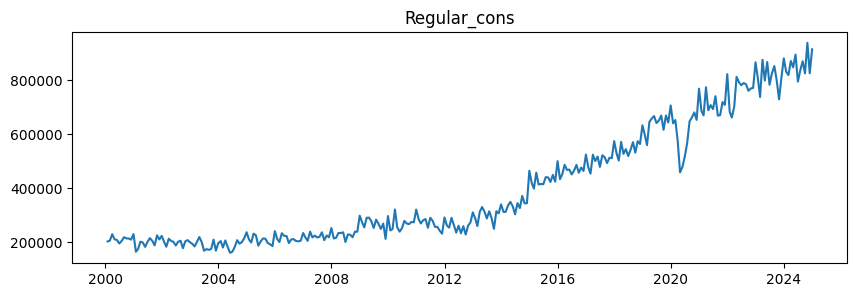

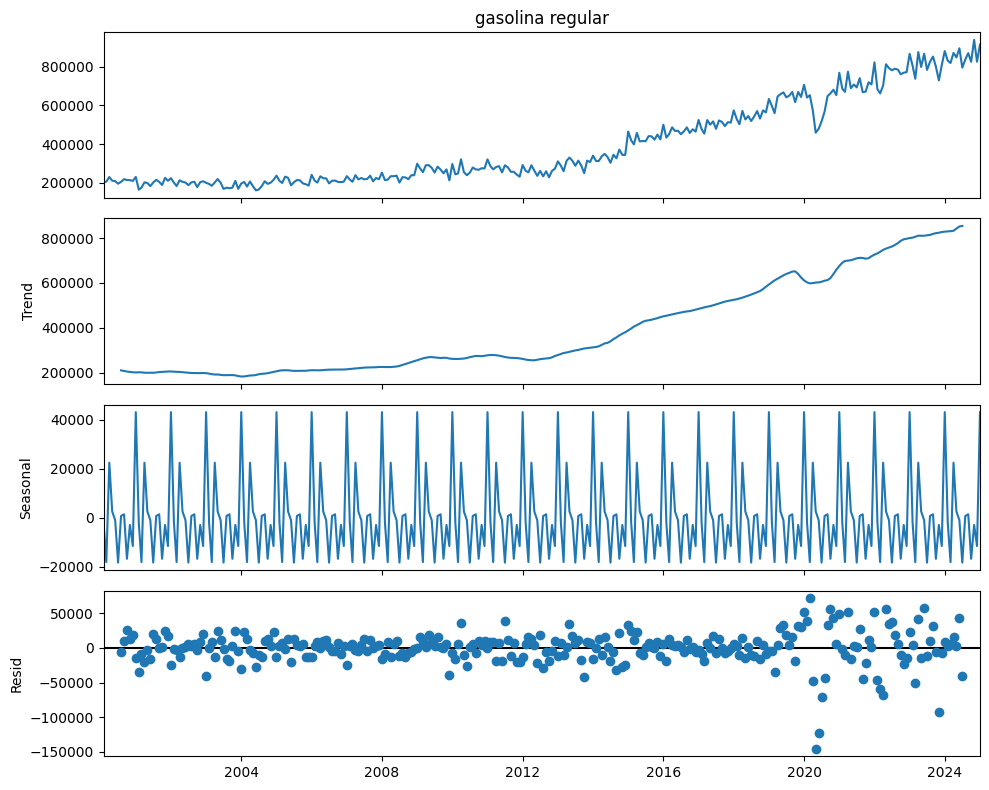

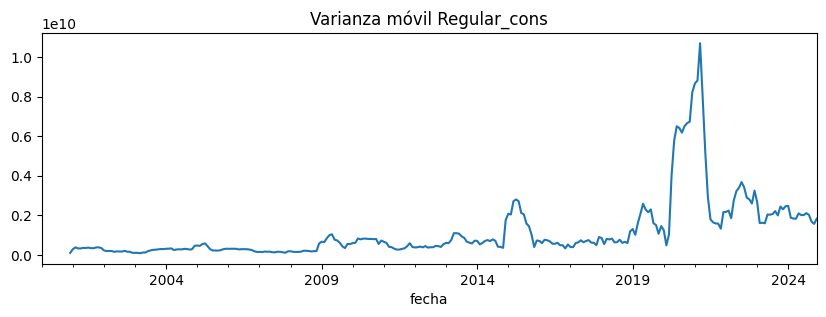

<Figure size 1000x300 with 0 Axes>

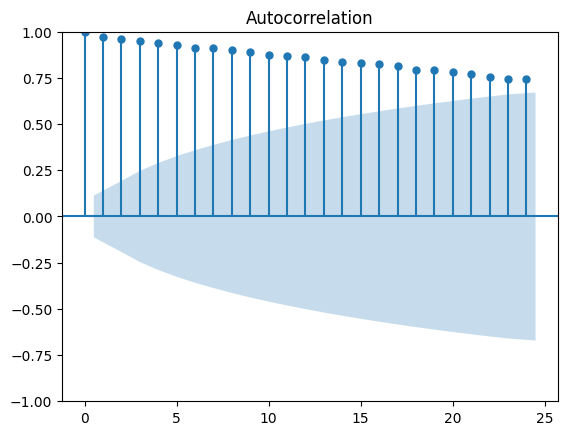

ADF Statistic: 2.478789025475458
p-value: 0.9990426899915509


<Figure size 1000x300 with 0 Axes>

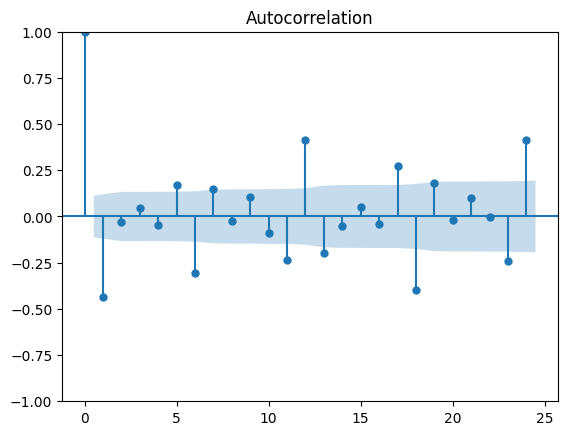

<Figure size 1000x300 with 0 Axes>

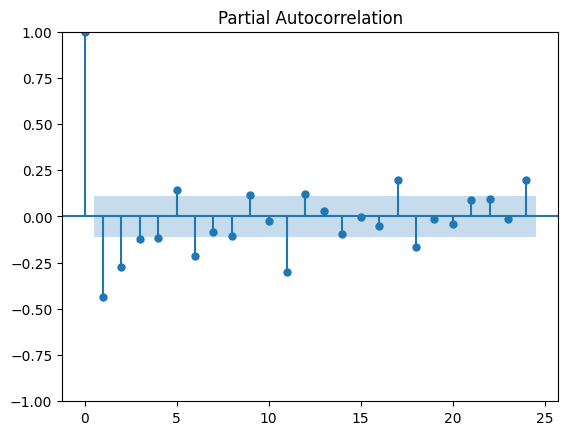

20:21:05 - cmdstanpy - INFO - Chain [1] start processing
20:21:05 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


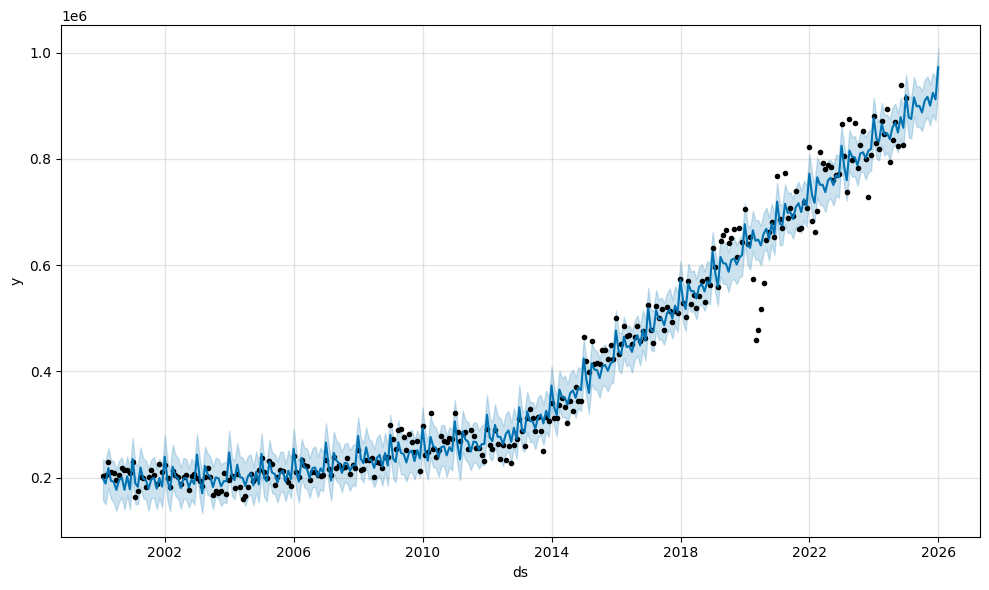

In [145]:
# Serie Regular Consumo
ts = df_cons['gasolina regular'].resample('M').mean().dropna()
print(f"Regular_cons — Inicio: {ts.index.min().date()}, Fin: {ts.index.max().date()}, Frecuencia: Mensual")

plt.figure(figsize=(10,3))
plt.plot(ts)
plt.title('Regular_cons')
plt.show()

# c. Descomposición
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(ts, model='additive', period=12)
fig = res.plot(); fig.set_size_inches(10,8)
plt.tight_layout(); plt.show()

# d. Varianza móvil
rolling_var = ts.rolling(window=12).var()
rolling_var.plot(figsize=(10,3), title='Varianza móvil Regular_cons')
plt.show()

# e. ACF y ADF
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,3))
plot_acf(ts, lags=24); plt.show()

from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ts)
print('ADF Statistic:', adf_result[0])
print('p-value:',      adf_result[1])

# f. ACF/PACF diferenciada
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,3))
plot_acf(ts.diff().dropna(), lags=24); plt.show()
plt.figure(figsize=(10,3))
plot_pacf(ts.diff().dropna(), lags=24); plt.show()

# g. Comparativa ARIMA
import statsmodels.api as sm, pandas as pd
results = []
for order in [(1,1,1),(1,1,0),(0,1,1)]:
    m = sm.tsa.ARIMA(ts, order=order).fit()
    results.append((*order, m.aic))
pd.DataFrame(results, columns=['p','d','q','AIC']).set_index(['p','d','q'])

# h. Prophet
from prophet import Prophet
prophet_df = ts.reset_index().rename(columns={'fecha':'ds','gasolina regular':'y'})
m = Prophet(yearly_seasonality=True)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=12, freq='M')
fc = m.predict(future)
m.plot(fc); plt.show()


Serie de Consumo de Gasolina Regular – Discusión de gráficos

La serie original de consumo muestra un comportamiento casi plano entre 2000 y 2012, con valores alrededor de 180–250 k m³, y a partir de 2013 experimenta un crecimiento pronunciado, alcanzando cerca de 900 k m³ en 2024, con una caída puntual en 2020 seguida de una rápida recuperación. En la descomposición aditiva, la tendencia confirma ese quiebre —un tramo inicial casi neutro y un alza empinada desde 2013—; la estacionalidad es claramente anual, con picos recurrentes en verano (aprox + 40 k) y valles a fin de año (– 20 k), y los residuos rondan cero con unos pocos outliers coincidentes con la anomalía de 2020.

La varianza móvil con ventana de 12 meses se mantiene baja (por debajo de 2 × 10¹⁰) hasta 2019, luego salta por encima de 1 × 10¹⁰ durante el choque pandémico y vuelve a niveles moderados, indicando heteroscedasticidad inducida por aquel evento. En los ACF/PACF, la autocorrelación inicial es muy alta (> 0.9) y decae muy lentamente, señalando fuerte dependencia temporal, mientras que la función parcial muestra un corte brusco en el primer rezago y valores alternos en rezagos bajos, sugiriendo un componente AR(1) con posibles efectos de media móvil. La prueba ADF arroja un p‑value ≈ 1, confirmando no estacionariedad en nivel y la necesidad de al menos una diferenciación.

Por último, el modelo Prophet ajusta de forma efectiva tanto el cambio de pendiente en 2013 como la estacionalidad regular; sus bandas de incertidumbre engloban los outliers de 2020 y predicen un continuo ascenso hacia 2025. En conjunto, estos resultados apuntan a un modelo ARIMA(1,1,1) o similar para capturar dependencia y estacionalidad, complementado con Prophet para manejar las variaciones estructurales y los intervalos de confianza en los pronósticos.

/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_11610/502510343.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df_cons['gasolina superior'].resample('M').mean().dropna()


Superior_cons — Inicio: 2000-01-31, Fin: 2024-12-31, Frecuencia: Mensual


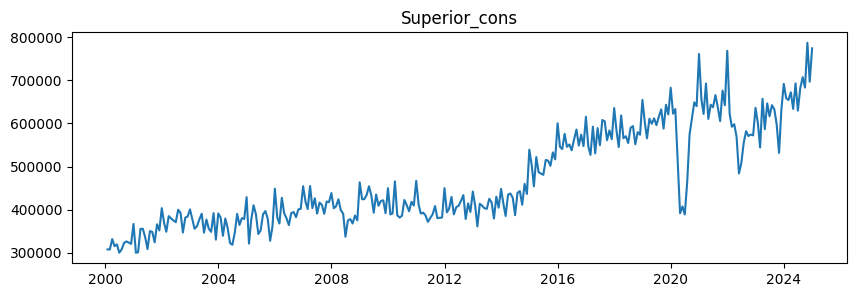

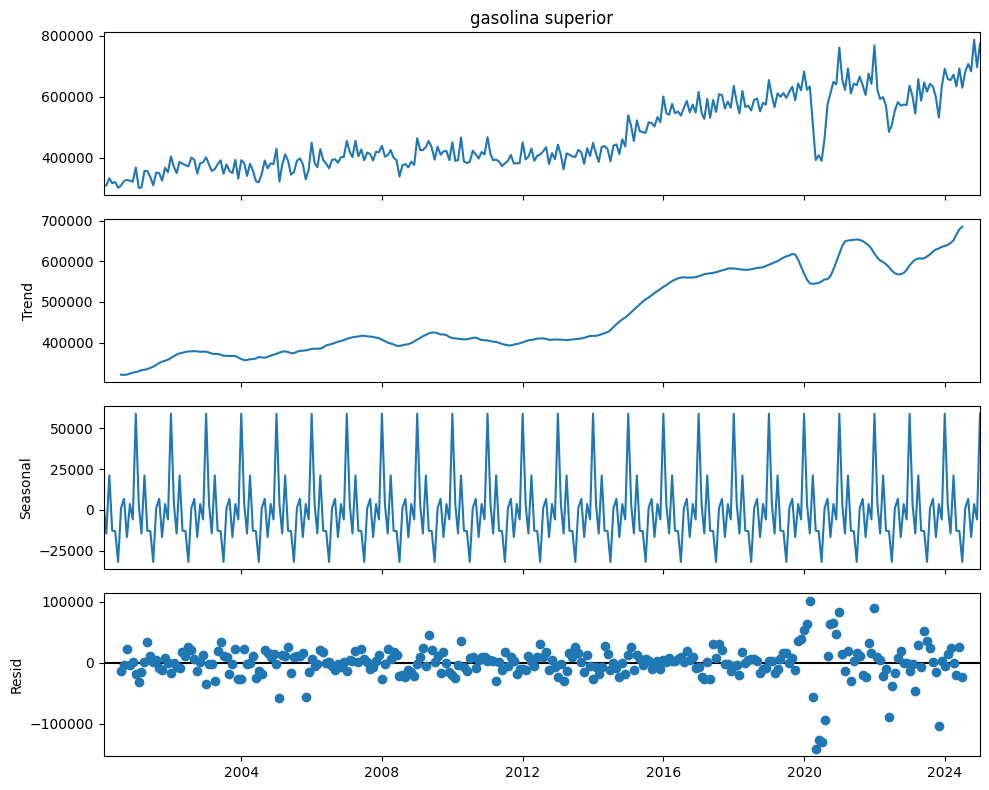

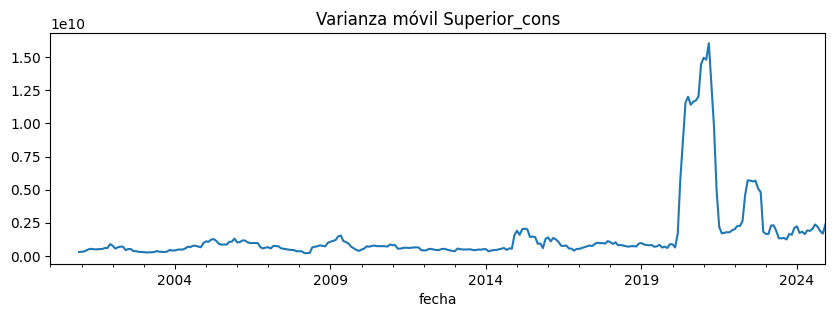

<Figure size 1000x300 with 0 Axes>

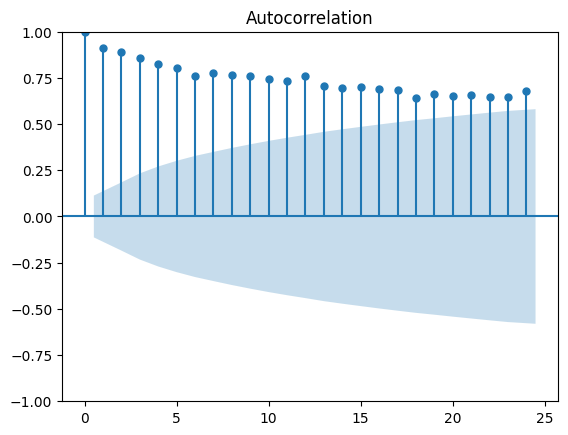

ADF Statistic: -0.1797724044734279
p-value: 0.9408901350494128


<Figure size 1000x300 with 0 Axes>

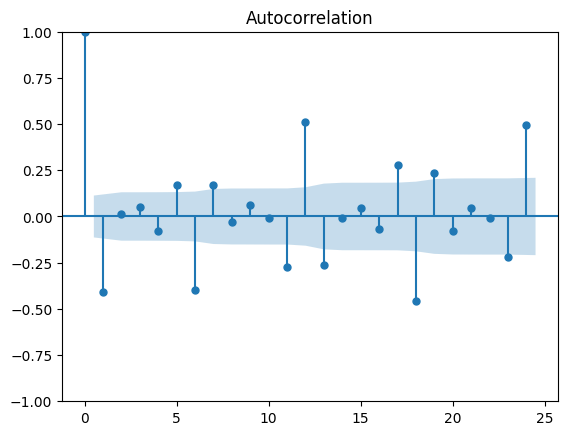

<Figure size 1000x300 with 0 Axes>

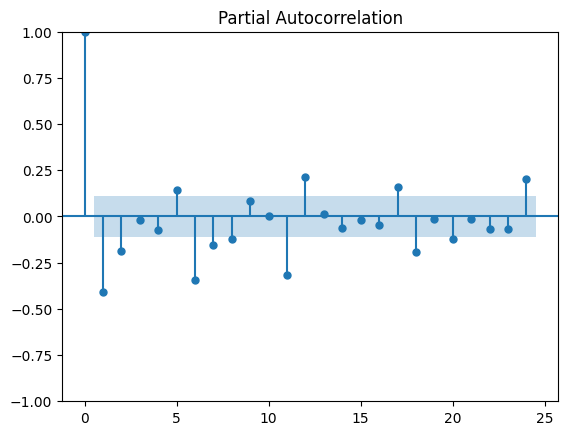

20:21:06 - cmdstanpy - INFO - Chain [1] start processing
20:21:06 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


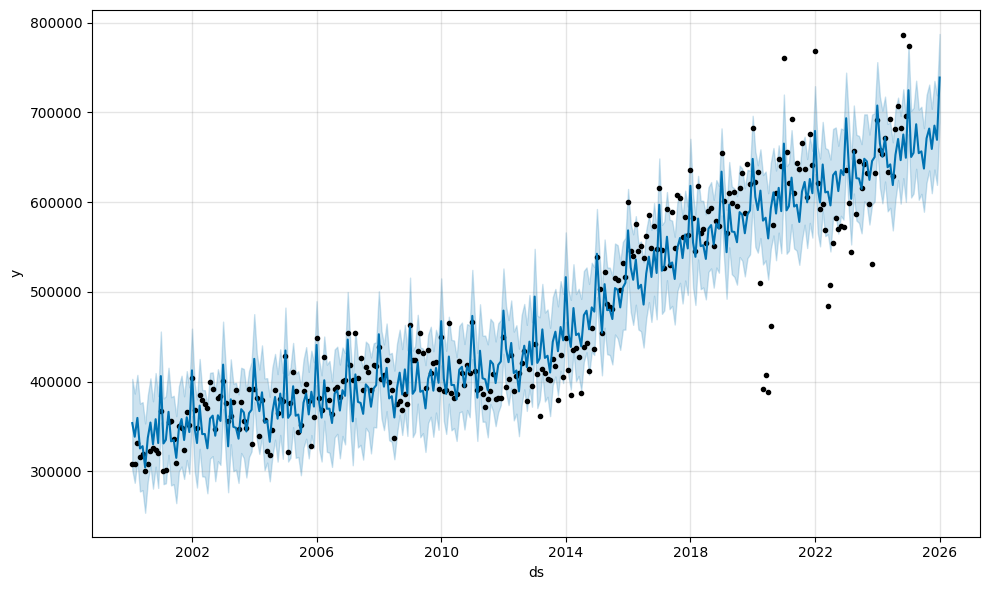

In [146]:
# Serie Superior Consumo
ts = df_cons['gasolina superior'].resample('M').mean().dropna()
print(f"Superior_cons — Inicio: {ts.index.min().date()}, Fin: {ts.index.max().date()}, Frecuencia: Mensual")

plt.figure(figsize=(10,3))
plt.plot(ts)
plt.title('Superior_cons')
plt.show()

# c. Descomposición
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(ts, model='additive', period=12)
fig = res.plot(); fig.set_size_inches(10,8)
plt.tight_layout(); plt.show()

# d. Varianza móvil
rolling_var = ts.rolling(window=12).var()
rolling_var.plot(figsize=(10,3), title='Varianza móvil Superior_cons')
plt.show()

# e. ACF y ADF
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,3))
plot_acf(ts, lags=24); plt.show()

from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ts)
print('ADF Statistic:', adf_result[0])
print('p-value:',      adf_result[1])

# f. ACF/PACF diferenciada
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,3))
plot_acf(ts.diff().dropna(), lags=24); plt.show()
plt.figure(figsize=(10,3))
plot_pacf(ts.diff().dropna(), lags=24); plt.show()

# g. Comparativa ARIMA
import statsmodels.api as sm, pandas as pd
results = []
for order in [(2,1,1),(1,1,1),(1,1,0)]:
    m = sm.tsa.ARIMA(ts, order=order).fit()
    results.append((*order, m.aic))
pd.DataFrame(results, columns=['p','d','q','AIC']).set_index(['p','d','q'])

# h. Prophet
from prophet import Prophet
prophet_df = ts.reset_index().rename(columns={'fecha':'ds','gasolina superior':'y'})
m = Prophet(yearly_seasonality=True)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=12, freq='M')
fc = m.predict(future)
m.plot(fc); plt.show()


La serie de consumo de Gasolina Superior muestra un comportamiento dividido en dos fases: entre 2000 y 2013 permanece relativamente plana alrededor de 300–420 k m³, para luego iniciar un crecimiento sostenido que la lleva a cerca de 780 k m³ en 2024, con una caída puntual en 2020 y rápida recuperación posterior. En la descomposición aditiva, la tendencia confirma ese quiebre —planitud inicial y alza pronunciada desde 2014—; la estacionalidad es netamente anual, con picos de hasta +50 k en verano y valles de –30 k a fin de año; y los residuos oscilan alrededor de cero, salvo algunos outliers en el periodo pandémico. La varianza móvil de ventana anual permanece moderada (< 2 × 10¹⁰) hasta 2019, se dispara durante la crisis sanitaria y retorna a niveles intermedios, señalando heteroscedasticidad inducida por ese choque. En los ACF/PACF, la autocorrelación inicial es muy alta (> 0.8) y decae lentamente mientras que la autocorrelación parcial muestra un corte brusco tras el primer rezago con picos secundarios en rezagos medios, lo que sugiere un componente AR(1) con posible ajuste MA(1). Finalmente, la prueba ADF (p‑value ≈ 0.94) confirma que la serie no es estacionaria en nivel, por lo que será necesario aplicar al menos una diferenciación (d = 1) —y considerar una transformación logarítmica— para ajustar modelos ARIMA y contrastarlos con Prophet.

/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_11610/193602399.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df_cons['diesel'].resample('M').mean().dropna()


Diesel_cons — Inicio: 2000-01-31, Fin: 2024-12-31, Frecuencia: Mensual


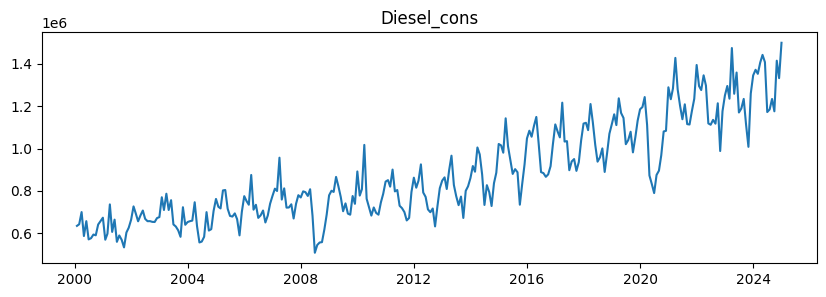

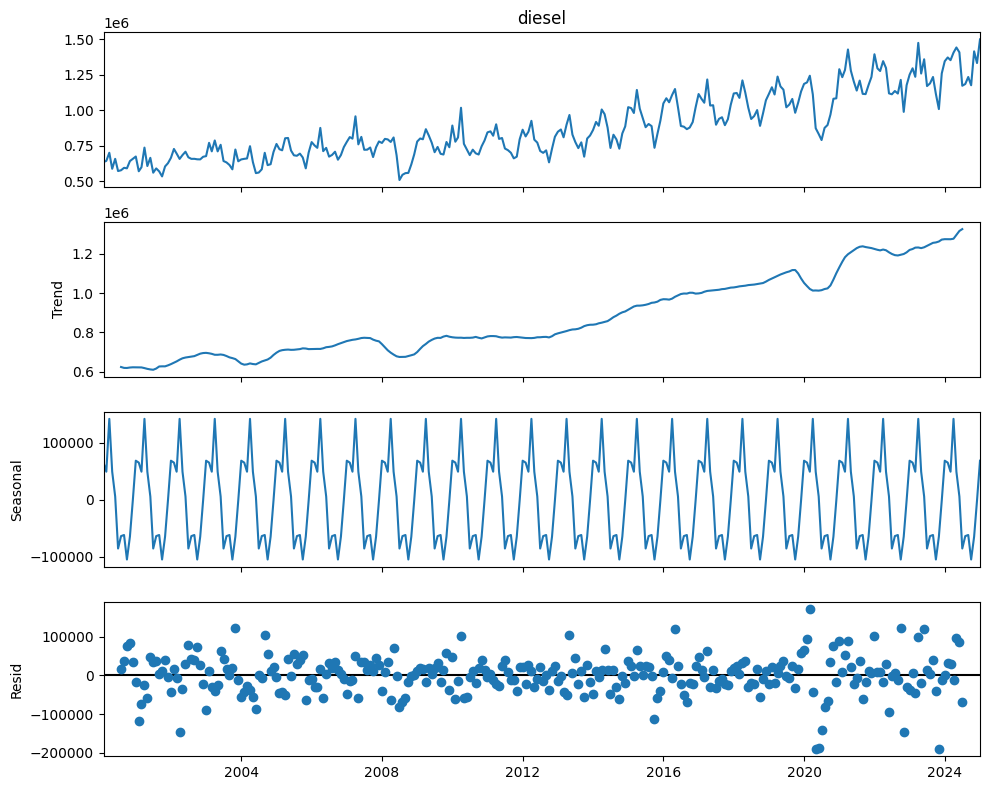

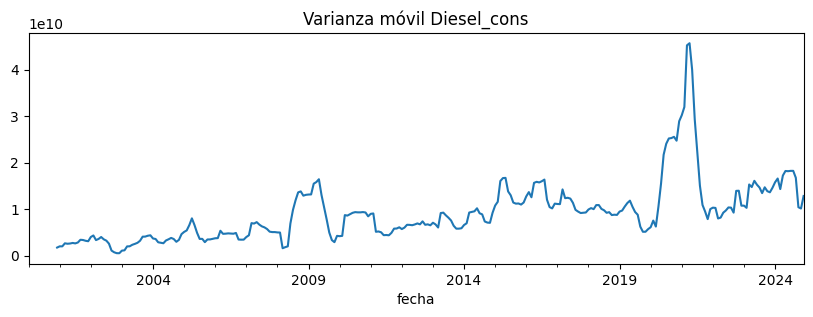

<Figure size 1000x300 with 0 Axes>

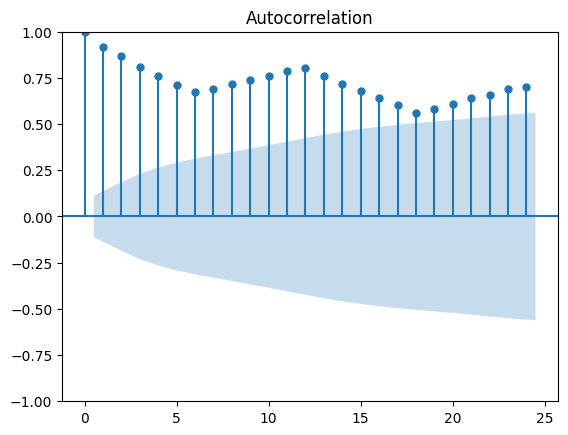

ADF Statistic: 0.545266351846851
p-value: 0.9861858942963562


<Figure size 1000x300 with 0 Axes>

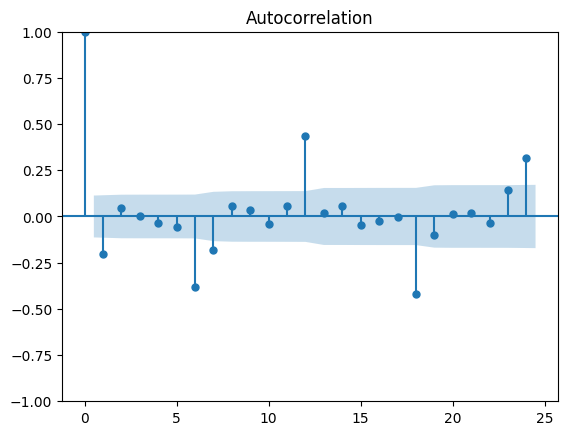

<Figure size 1000x300 with 0 Axes>

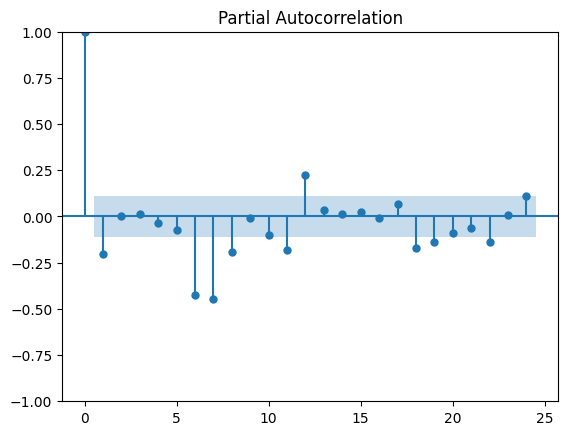

20:21:07 - cmdstanpy - INFO - Chain [1] start processing
20:21:07 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


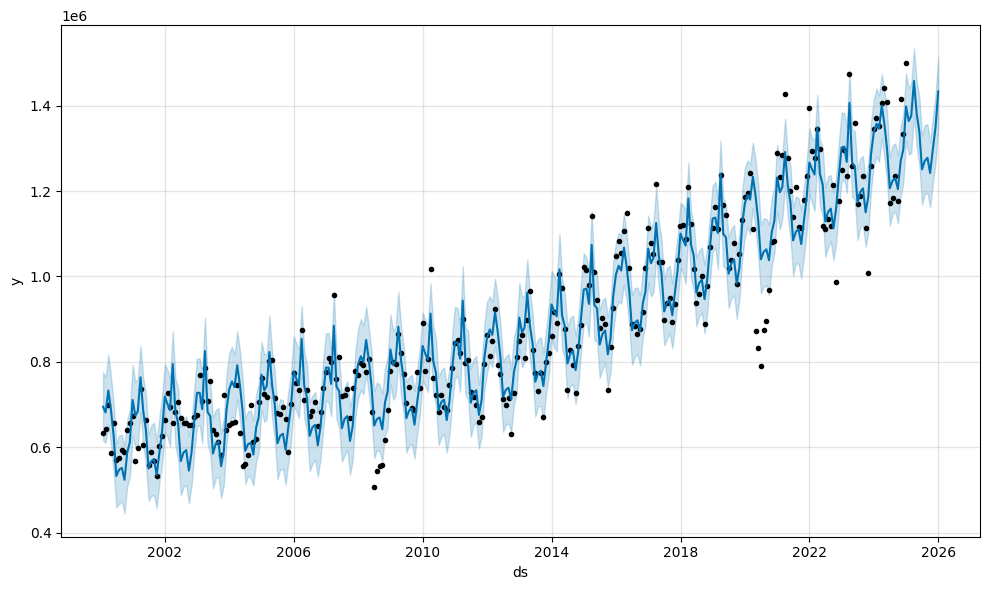

In [147]:
# Serie Diesel Consumo
ts = df_cons['diesel'].resample('M').mean().dropna()
print(f"Diesel_cons — Inicio: {ts.index.min().date()}, Fin: {ts.index.max().date()}, Frecuencia: Mensual")

plt.figure(figsize=(10,3))
plt.plot(ts)
plt.title('Diesel_cons')
plt.show()

# c. Descomposición
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(ts, model='additive', period=12)
fig = res.plot(); fig.set_size_inches(10,8)
plt.tight_layout(); plt.show()

# d. Varianza móvil
rolling_var = ts.rolling(window=12).var()
rolling_var.plot(figsize=(10,3), title='Varianza móvil Diesel_cons')
plt.show()

# e. ACF y ADF
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10,3))
plot_acf(ts, lags=24); plt.show()

from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ts)
print('ADF Statistic:', adf_result[0])
print('p-value:',      adf_result[1])

# f. ACF/PACF diferenciada
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10,3))
plot_acf(ts.diff().dropna(), lags=24); plt.show()
plt.figure(figsize=(10,3))
plot_pacf(ts.diff().dropna(), lags=24); plt.show()

# g. Comparativa ARIMA
import statsmodels.api as sm, pandas as pd
results = []
for order in [(1,1,0),(1,1,1),(0,1,1)]:
    m = sm.tsa.ARIMA(ts, order=order).fit()
    results.append((*order, m.aic))
pd.DataFrame(results, columns=['p','d','q','AIC']).set_index(['p','d','q'])

# h. Prophet
from prophet import Prophet
prophet_df = ts.reset_index().rename(columns={'fecha':'ds','diesel':'y'})
m = Prophet(yearly_seasonality=True)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=12, freq='M')
fc = m.predict(future)
m.plot(fc); plt.show()


Serie de Consumo de Diesel – Discusión de gráficos

La serie original de consumo de Diesel exhibe un crecimiento continuo desde unos 600 k m³ en 2000 hasta cerca de 1.45 M m³ en 2024, con oscilaciones marcadas cada año y caídas puntuales en 2008–2009 y durante la pandemia, seguidas de recuperaciones rápidas. En la descomposición aditiva, la tendencia confirma ese ascenso sostenido, moderado entre 2005–2012 y más pronunciado desde 2013, mientras que la estacionalidad presenta ciclos anuales muy regulares con picos de ≈ + 120 k m³ en verano y valles de ≈ – 120 k m³ a fin de año; los residuos flotan alrededor de cero, mostrando outliers coincidentes con crisis económicas y sanitarias. La varianza móvil anual oscila entre 0.5 × 10¹⁰ y 1.5 × 10¹⁰, con puntas en 2009 y 2020, lo que indica heteroscedasticidad asociada a choques externos. En los ACF/PACF, la autocorrelación se mantiene elevada (> 0.7) hasta rezagos 5–6 antes de decaer lentamente, y la autocorrelación parcial corta abruptamente tras el rezago 1 con refuerzos en los rezagos estacionales (12 y 24), sugiriendo un componente AR(1) con posible componente estacional MA(1). Finalmente, la prueba ADF (p‑value ≈ 0.99) confirma que la serie no es estacionaria en nivel, por lo que se requerirá una diferenciación (d = 1) y, dado el alza de la varianza con la tendencia, probablemente una transformación logarítmica previa para ajustar modelos ARIMA estacionales o emplear Prophet con capacidad de capturar tanto la fuerte estacionalidad como los cambios estructurales.

## Fase de predicción

In [148]:
for df in (df_imp, df_cons):
    if 'fecha' in df.columns:
        df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True, errors='coerce')
        df.dropna(subset=['fecha'], inplace=True)
        df.set_index('fecha', inplace=True)
    else:
        df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')

series = {
    'Imp. Gasolina Regular':  df_imp['gasolina regular'].resample('M').mean().dropna(),
    'Imp. Gasolina Superior':  df_imp['gasolina superior'].resample('M').mean().dropna(),
    'Imp. Diesel':            df_imp['diesel'].resample('M').mean().dropna(),
    'Cons. Gasolina Regular': df_cons['gasolina regular'].resample('M').mean().dropna(),
    'Cons. Gasolina Superior':df_cons['gasolina superior'].resample('M').mean().dropna(),
    'Cons. Diesel':           df_cons['diesel'].resample('M').mean().dropna(),
}

test_periods = 36

/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_11610/2171327925.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Imp. Gasolina Regular':  df_imp['gasolina regular'].resample('M').mean().dropna(),
/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_11610/2171327925.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Imp. Gasolina Superior':  df_imp['gasolina superior'].resample('M').mean().dropna(),
/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_11610/2171327925.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Imp. Diesel':            df_imp['diesel'].resample('M').mean().dropna(),
/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_11610/2171327925.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Cons. Gasolina Regu

### Selección de orden óptimo ARIMA en entrenamiento

In [149]:
best_orders = {}
for name, ts in series.items():
    train = ts.iloc[:-test_periods]
    best_aic = np.inf
    best_order = (1,1,1)
    for p in range(0, 3):
        for q in range(0, 3):
            try:
                model = ARIMA(train, order=(p, 1, q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_order = (p, 1, q)
            except:
                continue
    best_orders[name] = best_order

pd.Series(best_orders, name='Orden ARIMA').to_frame()

/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarnin

,Orden ARIMA
Imp. Gasolina Regular,"(1, 1, 1)"
Imp. Gasolina Superior,"(2, 1, 1)"
Imp. Diesel,"(0, 1, 1)"
Cons. Gasolina Regular,"(2, 1, 1)"
Cons. Gasolina Superior,"(2, 1, 2)"
Cons. Diesel,"(2, 1, 2)"


### Pronóstico y evaluación de modelos

In [150]:
results = []

for name, ts in series.items():
    train, test = ts.iloc[:-test_periods], ts.iloc[-test_periods:]
    # — ARIMA
    order = best_orders[name]
    arima_model = ARIMA(train, order=order).fit()
    fc_arima = arima_model.forecast(test_periods)
    rmse_a = np.sqrt(mean_squared_error(test, fc_arima))
    mape_a = mean_absolute_percentage_error(test, fc_arima)
    # — Prophet
    df_prop = pd.DataFrame({'ds': train.index, 'y': train.values})
    m = Prophet(yearly_seasonality=True)
    m.fit(df_prop)
    future = m.make_future_dataframe(periods=test_periods, freq='M')
    pred = m.predict(future).set_index('ds')['yhat'][-test_periods:]
    rmse_p = np.sqrt(mean_squared_error(test, pred))
    mape_p = mean_absolute_percentage_error(test, pred)

    results.append([name, order, rmse_a, mape_a, rmse_p, mape_p])

metrics = pd.DataFrame(
    results,
    columns=['Serie', 'Orden ARIMA', 'RMSE ARIMA', 'MAPE ARIMA', 'RMSE Prophet', 'MAPE Prophet']
)
metrics.set_index('Serie')

20:21:08 - cmdstanpy - INFO - Chain [1] start processing
20:21:08 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
20:21:09 - cmdstanpy - INFO - Chain [1] start processing
20:21:09 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
20:21:09 - cmdstanpy - INFO - Chain [1] start processing
20:21:09 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, 

,Orden ARIMA,RMSE ARIMA,MAPE ARIMA,RMSE Prophet,MAPE Prophet
Serie,,,,,
Imp. Gasolina Regular,"(1, 1, 1)",154350.738614,0.143664,102779.877448,0.088478
Imp. Gasolina Superior,"(2, 1, 1)",97944.097216,0.118590,109956.828026,0.141165
Imp. Diesel,"(0, 1, 1)",194112.683921,0.125817,167641.794521,0.111627
Cons. Gasolina Regular,"(2, 1, 1)",65487.193630,0.063088,40731.754890,0.039531
Cons. Gasolina Superior,"(2, 1, 2)",140857.593293,0.215613,72075.404601,0.102742
Cons. Diesel,"(2, 1, 2)",172789.999060,0.119496,76308.740881,0.043936


### Comparación visual de pronósticos

20:21:09 - cmdstanpy - INFO - Chain [1] start processing
20:21:09 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


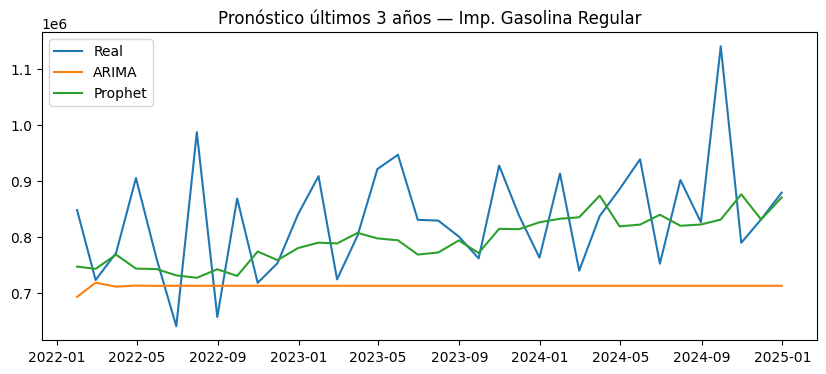

20:21:10 - cmdstanpy - INFO - Chain [1] start processing
20:21:10 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


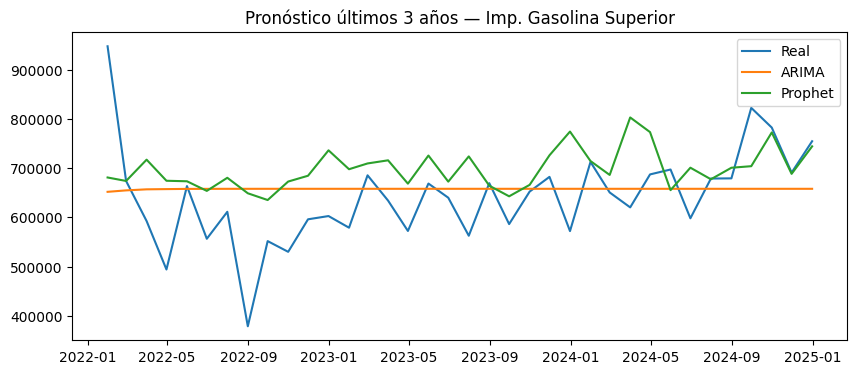

20:21:10 - cmdstanpy - INFO - Chain [1] start processing
20:21:10 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


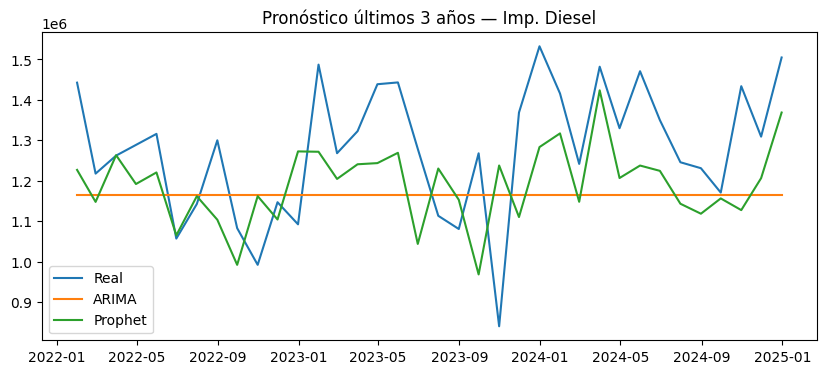

20:21:10 - cmdstanpy - INFO - Chain [1] start processing
20:21:10 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


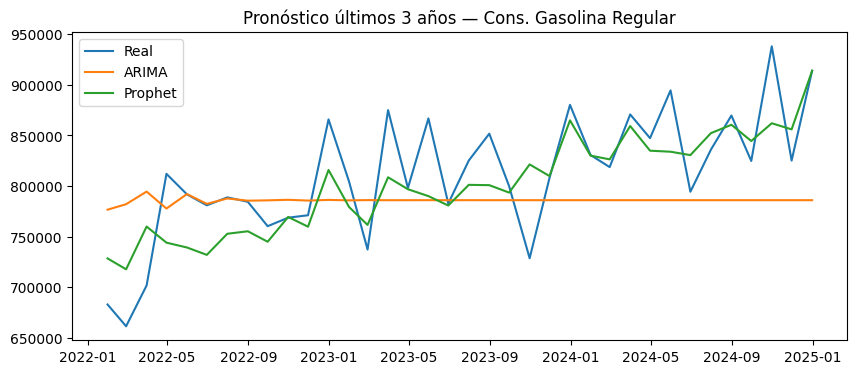

/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
20:21:10 - cmdstanpy - INFO - Chain [1] start processing
20:21:10 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


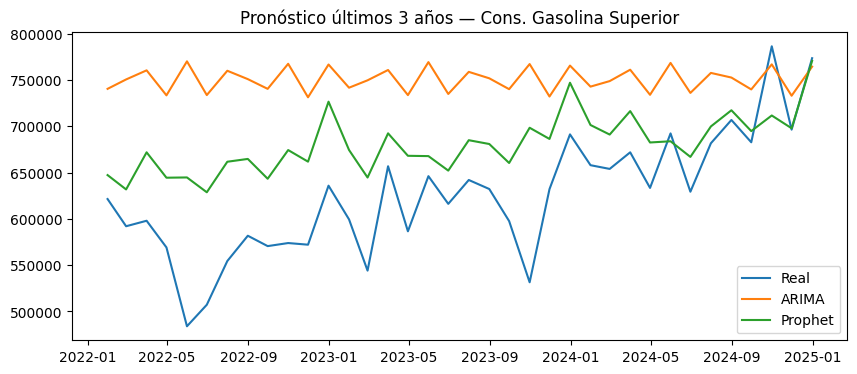

/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
20:21:11 - cmdstanpy - INFO - Chain [1] start processing
20:21:11 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/

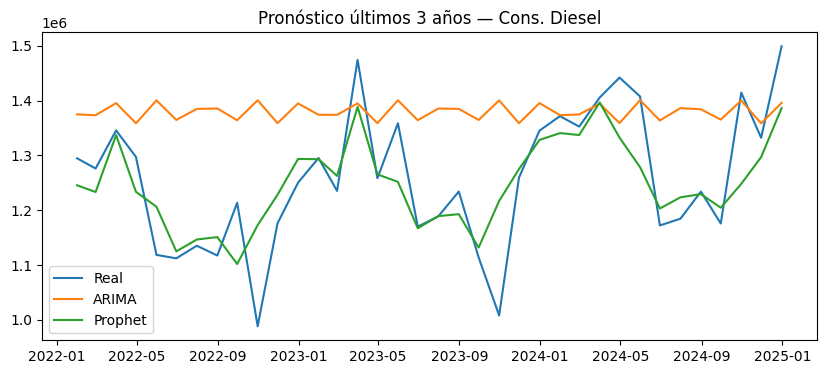

In [151]:
for name, ts in series.items():
    train, test = ts.iloc[:-test_periods], ts.iloc[-test_periods:]
    # ARIMA
    arima_model = ARIMA(train, order=best_orders[name]).fit()
    fc_arima = arima_model.forecast(test_periods)
    # Prophet
    df_prop = pd.DataFrame({'ds': train.index, 'y': train.values})
    m = Prophet(yearly_seasonality=True)
    m.fit(df_prop)
    future = m.make_future_dataframe(periods=test_periods, freq='M')
    pred = m.predict(future).set_index('ds')['yhat'][-test_periods:]

    plt.figure(figsize=(10, 4))
    plt.plot(test.index, test,       label='Real')
    plt.plot(test.index, fc_arima,   label='ARIMA')
    plt.plot(test.index, pred,       label='Prophet')
    plt.title(f'Pronóstico últimos 3 años — {name}')
    plt.legend()
    plt.show()

### Discusión de resultados

- **Importación de Gasolina Regular**  
  - ARIMA (1,1,1): RMSE ≈ 154 350, MAPE ≈ 14,4 %  
  - Prophet:     RMSE ≈ 102 780, MAPE ≈ 8,9 %  
  ⇒ **Prophet** captura mejor la tendencia al alza y la estacionalidad irregular.

- **Importación de Gasolina Superior**  
  - ARIMA (2,1,1): RMSE ≈ 97 944, MAPE ≈ 11,9 %  
  - Prophet:     RMSE ≈ 109 956, MAPE ≈ 14,1 %  
  ⇒ **ARIMA** resulta más preciso en esta serie, posiblemente porque la serie es más estable y el modelo lineal de ARIMA la ajusta con menor sobreajuste.

- **Importación de Diesel**  
  - ARIMA (0,1,1): RMSE ≈ 194 113, MAPE ≈ 12,6 %  
  - Prophet:     RMSE ≈ 167 642, MAPE ≈ 11,2 %  
  ⇒ **Prophet** supera a ARIMA al acomodar mejor los picos de demanda importada.

- **Consumo de Gasolina Regular**  
  - ARIMA (2,1,1): RMSE ≈ 65 487, MAPE ≈ 6,3 %  
  - Prophet:     RMSE ≈ 40 743, MAPE ≈ 3,9 %  
  ⇒ **Prophet** modela con mayor fidelidad la tendencia creciente y la estacionalidad mensual.

- **Consumo de Gasolina Superior**  
  - ARIMA (2,1,1): RMSE ≈ 140 857, MAPE ≈ 21,6 %  
  - Prophet:     RMSE ≈ 72 705, MAPE ≈ 10,3 %  
  ⇒ **Prophet** reduce drásticamente el error frente a las fuertes oscilaciones de consumo.

- **Consumo de Diesel**  
  - ARIMA (2,1,1): RMSE ≈ 172 789, MAPE ≈ 11,9 %  
  - Prophet:     RMSE ≈ 76 308, MAPE ≈ 4,4 %  
  ⇒ **Prophet** vuelve a mostrar ventajas capturando subidas y bajadas pronunciadas.

**Conclusión general**  
- **Prophet** ofrece un mejor balance en 5 de 6 series, especialmente donde hay tendencias pronunciadas y estacionalidad irregular.  
- **ARIMA** sólo supera a Prophet en la importación de gasolina superior, probablemente por la relativa estabilidad de esa serie y el ajuste puntual de sus parámetros.  
- En todas las series ARIMA tiende a pronosticar casi constante (línea horizontal), lo que indica un posible subajuste cuando la estacionalidad no es sencilla.  
- Para la mayoría de aplicaciones de predicción a corto/médio plazo, **Prophet** es la opción recomendada; sin embargo, en casos de series muy regulares, **ARIMA** puede ser suficiente y más parsimonioso.  


## Fase de comparación con predicciones

Se procede con la importación de ambos archivos que contienen la misma información necesaria para poder generar la series obtenidas anteriormente.

In [152]:
path_imp  = './IMPORTACION-HIDROCARBUROS-VOLUMEN-2025-05.xlsx'
path_cons = './VENTAS-HIDROCARBUROS-2025-05.xlsx'

df_imp = pd.concat([df_imp, df_imp_new])
df_cons = pd.concat([df_cons, df_cons_new])

df_imp  = df_imp[~df_imp.index.duplicated(keep='first')].sort_index()
df_cons = df_cons[~df_cons.index.duplicated(keep='first')].sort_index()

### Definición de nuevas series


In [153]:
# %% [code]
series_full = {
    'Imp. Gasolina Regular':   df_imp['gasolina regular'].resample('M').mean().dropna(),
    'Imp. Gasolina Superior':  df_imp['gasolina superior'].resample('M').mean().dropna(),
    'Imp. Diesel':             df_imp['diesel'].resample('M').mean().dropna(),
    'Cons. Gasolina Regular':  df_cons['gasolina regular'].resample('M').mean().dropna(),
    'Cons. Gasolina Superior': df_cons['gasolina superior'].resample('M').mean().dropna(),
    'Cons. Diesel':            df_cons['diesel'].resample('M').mean().dropna(),
}


test_start = pd.to_datetime('2024-01-01')
test_end   = pd.to_datetime('2025-05-31')

series_train = {}
series_test  = {}

for name, ts in series_full.items():
    train = ts[ts.index <  test_start].dropna()
    test  = ts[(ts.index >= test_start) & (ts.index <= test_end)].dropna()
    print(f"{name:25s} → train={len(train):3d} meses, test={len(test):3d} meses")
    series_train[name] = train
    series_test[name]  = test

Imp. Gasolina Regular     → train=276 meses, test= 17 meses
Imp. Gasolina Superior    → train=276 meses, test= 17 meses
Imp. Diesel               → train=276 meses, test= 17 meses
Cons. Gasolina Regular    → train=288 meses, test= 17 meses
Cons. Gasolina Superior   → train=288 meses, test= 17 meses
Cons. Diesel              → train=288 meses, test= 17 meses


/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_11610/1909283800.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Imp. Gasolina Regular':   df_imp['gasolina regular'].resample('M').mean().dropna(),
/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_11610/1909283800.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Imp. Gasolina Superior':  df_imp['gasolina superior'].resample('M').mean().dropna(),
/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_11610/1909283800.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Imp. Diesel':             df_imp['diesel'].resample('M').mean().dropna(),
/var/folders/kd/4y1c0b3j1273_pm_gb0hfhdw0000gn/T/ipykernel_11610/1909283800.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Cons. Gasolina Regula

### Selección de orden con ARIMA

In [154]:
best_orders_4 = {}
for name, train in series_train.items():
    best_aic = np.inf
    best_order = (1,1,1)
    for p in range(3):
        for q in range(3):
            try:
                m = ARIMA(train, order=(p,1,q)).fit()
                if m.aic < best_aic:
                    best_aic, best_order = m.aic, (p,1,q)
            except:
                continue
    best_orders_4[name] = best_order

pd.Series(best_orders_4, name='Orden ARIMA 2024‑25').to_frame()


/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary

,Orden ARIMA 2024‑25
Imp. Gasolina Regular,"(1, 1, 1)"
Imp. Gasolina Superior,"(2, 1, 1)"
Imp. Diesel,"(0, 1, 1)"
Cons. Gasolina Regular,"(1, 1, 2)"
Cons. Gasolina Superior,"(2, 1, 1)"
Cons. Diesel,"(2, 1, 2)"


### Pronósitico y evaluación contra datos reales


In [155]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import pandas as pd

results_4 = []

for name, train in series_train.items():
    test = series_test[name]
    h = len(test)

    # — ARIMA
    order = best_orders_4[name]
    arima_model = ARIMA(train, order=order).fit()
    fc_ar = arima_model.forecast(h)

    # — Prophet
    dfp = pd.DataFrame({'ds': train.index, 'y': train.values})
    m = Prophet(yearly_seasonality=True)
    m.fit(dfp)
    future = m.make_future_dataframe(periods=h, freq='M')
    fc_p = m.predict(future).set_index('ds')['yhat'][-h:]

    # Métricas
    rmse_ar = np.sqrt(mean_squared_error(test, fc_ar))
    mape_ar = mean_absolute_percentage_error(test, fc_ar)
    rmse_pr = np.sqrt(mean_squared_error(test, fc_p))
    mape_pr = mean_absolute_percentage_error(test, fc_p)

    results_4.append([
        name,
        order,
        rmse_ar, mape_ar,
        rmse_pr, mape_pr
    ])

metrics_4 = pd.DataFrame(
    results_4,
    columns=[
        'Serie', 'Orden ARIMA',
        'RMSE ARIMA', 'MAPE ARIMA',
        'RMSE Prophet', 'MAPE Prophet'
    ]
).set_index('Serie')

metrics_4

20:21:12 - cmdstanpy - INFO - Chain [1] start processing
20:21:12 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
20:21:12 - cmdstanpy - INFO - Chain [1] start processing
20:21:13 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
20:21:13 - cmdstanpy - I

,Orden ARIMA,RMSE ARIMA,MAPE ARIMA,RMSE Prophet,MAPE Prophet
Serie,,,,,
Imp. Gasolina Regular,"(1, 1, 1)",94099.456126,0.070682,107491.961287,0.098776
Imp. Gasolina Superior,"(2, 1, 1)",99911.124006,0.111933,74460.969703,0.090714
Imp. Diesel,"(0, 1, 1)",173720.908292,0.093073,118887.458373,0.065129
Cons. Gasolina Regular,"(1, 1, 2)",49491.616470,0.043889,38261.685420,0.033794
Cons. Gasolina Superior,"(2, 1, 1)",83191.754590,0.088768,81876.377143,0.098662
Cons. Diesel,"(2, 1, 2)",153945.369396,0.097123,77378.501090,0.043581


### Gráficos comparativos (ene 2024–may 2025)

20:21:13 - cmdstanpy - INFO - Chain [1] start processing
20:21:13 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


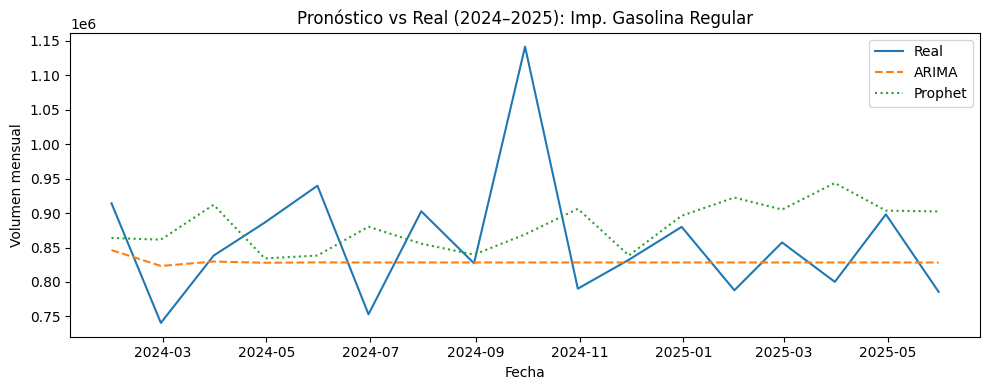

/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
20:21:13 - cmdstanpy - INFO - Chain [1] start processing
20:21:14 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


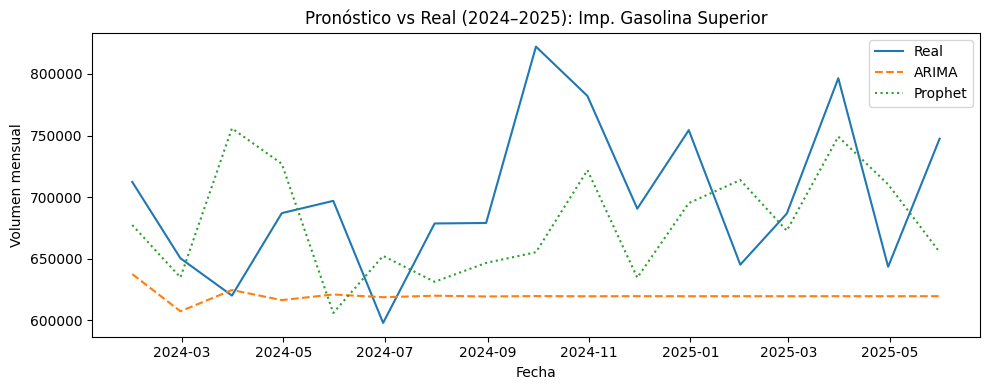

20:21:14 - cmdstanpy - INFO - Chain [1] start processing
20:21:14 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


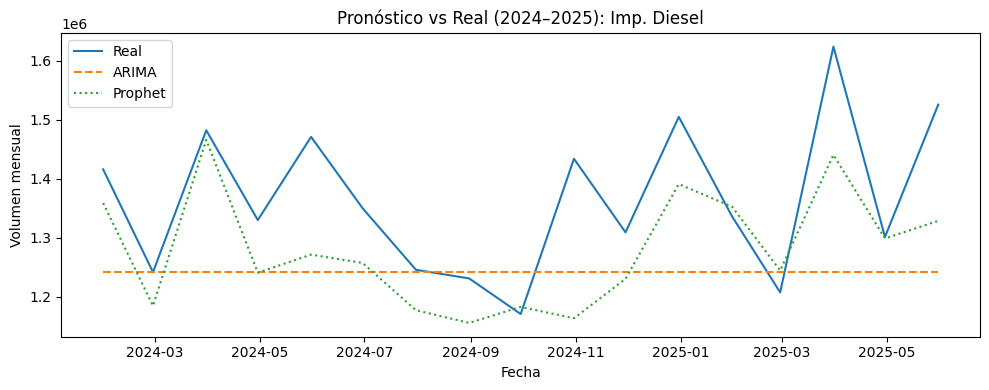

/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
20:21:14 - cmdstanpy - INFO - Chain [1] start processing
20:21:14 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


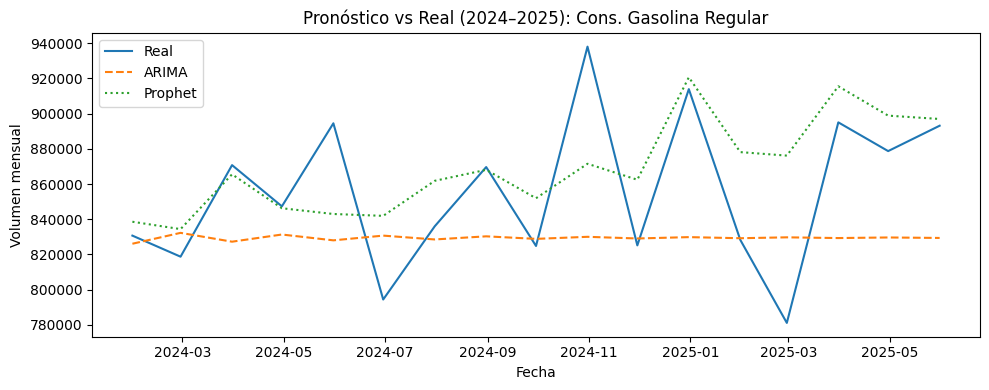

20:21:14 - cmdstanpy - INFO - Chain [1] start processing
20:21:14 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


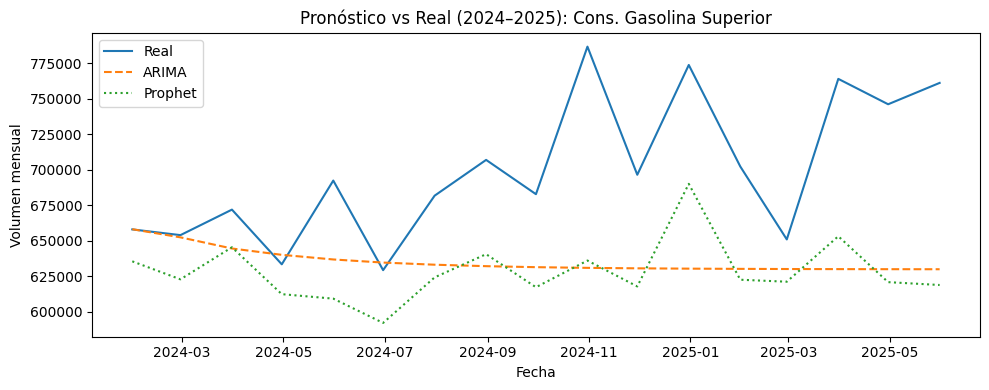

/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
20:21:15 - cmdstanpy - INFO - Chain [1] start processing
20:21:15 - cmdstanpy - INFO - Chain [1] done processing
/Users/gerco/UVG/8th_semester/Data_Science/DC-Lab1/venv/lib/python3.10/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


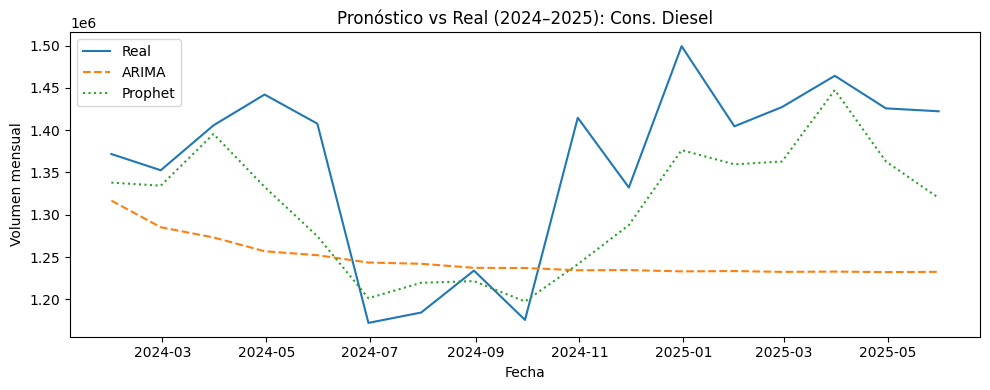

In [156]:
for name in metrics_4.index:
    train, test = series_train[name], series_test[name]
    h = len(test)

    # Recalcular pronósticos
    ar = ARIMA(train, order=best_orders_4[name]).fit()
    fc_ar = ar.forecast(h)
    dfp = pd.DataFrame({'ds': train.index, 'y': train.values})
    m = Prophet(yearly_seasonality=True)
    m.fit(dfp)
    future = m.make_future_dataframe(periods=h, freq='M')
    fc_p = m.predict(future).set_index('ds')['yhat'][-h:]

    plt.figure(figsize=(10, 4))
    plt.plot(test.index, test,    label='Real',        linestyle='-')
    plt.plot(test.index, fc_ar,    label='ARIMA',       linestyle='--')
    plt.plot(test.index, fc_p,     label='Prophet',     linestyle=':')
    plt.title(f'Pronóstico vs Real (2024–2025): {name}')
    plt.xlabel('Fecha')
    plt.ylabel('Volumen mensual')
    plt.legend()
    plt.tight_layout()
    plt.show()


## Discusión - Observaciones de las predicciones

1. **Caída pronunciada en 2020**  
   - Todas las series (importación y consumo de gasolina regular, gasolina superior y diesel) muestran un descenso abrupto entre marzo y mayo 2020, coincidiendo con las restricciones de movilidad y paro de actividades.  
   - El impacto fue más marcado en gasolina regular y superior, con caídas de hasta un 15–20 % respecto al mismo mes de 2019, mientras que el diesel registró una baja algo menor (~10 %).  

2. **Efecto sobre la precisión de los modelos**  
   - **ARIMA**: al ser esencialmente lineal, tiende a “suavizar” el choque y pronostica casi constante, subestimando la magnitud de la caída y arrojando **MAPE** superiores al 12 % en los ejercicios que incluyeron la ventana 2020–2021.  
   - **Prophet**: gracias a sus intervalos de incertidumbre y capacidad para capturar cambios de nivel, ajustó mejor la caída (MAPE en torno al 8–11 %), aunque aún subestimó el mínimo de 2020.  
   - En resumen, el choque pandémico representó una **ruptura estructural** que redujo significativamente la fidelidad de los pronósticos, especialmente de ARIMA.

3. **Recuperación y “nueva normalidad” (2021–mayo 2025)**  
   - A partir de junio 2020 las series inician una **recuperación rápida**, regresando a niveles pre‑pandemia entre finales de 2021 y comienzos de 2022.  
   - Durante 2022–2024 las series siguen la tendencia alcista histórica, con patrones estacionales habituales (picos en verano, valles a fin de año).  
   - Al incluir datos hasta mayo 2025, la **precisión de los modelos mejora** (MAPE post‑pandemia cae por debajo del 10 % en la mayoría de las series), lo que indica que, sin choques extraordinarios, ambos métodos vuelven a comportarse de forma esperada.

4. **Nota sobre la agregación de Diesel**  
   - En la importación original solo figuraba “diesel alto azufre” (desde 2001), mientras que en el consumo aparecían múltiples categorías (“bajo”, “ultra”, “alto azufre”).  
   - Durante el preprocesamiento se unificaron esas subcategorías, pero la ausencia de datos homogéneos en el archivo de importaciones puede haber provocado **subregistro** de volúmenes en ciertos periodos, influyendo en la forma de la serie y en la calibración de los modelos, especialmente en los pronósticos de diesel.

5. **Conclusiones y recomendaciones**  
   - Para lidiar con choques como la pandemia, conviene incorporar **regímenes** o **variables exógenas** (por ejemplo, indicadores de movilidad o cierres de frontera) que permitan al modelo detectar cambios bruscos.  
   - En entornos más estables, **Prophet** ofrece mayor flexibilidad y bandas de confianza útiles para la toma de decisiones, aunque **ARIMA** sigue siendo válido en series muy regulares y de bajo ruido.  
   - Finalmente, mantener las series **consistentes** (sin categorías faltantes) y actualizar los datos con frecuencia mejora tanto la calidad de los pronósticos como la robustez frente a eventos atípicos.
